# Rossmann

$\textbf{Data Source}$: 
Kaggle Rossmann Store Sales Competition https://www.kaggle.com/c/rossmann-store-sales

$\textbf{Data Preparation}$: To run this Jupyter Notebook, download data from Kaggle website and place the files 'train.csv', 'test.csv', and 'store.csv' into the 'Rossmann' directory of your cloned version of the NeuralNetworkLibrary repository.

NOTE: In addition to the csv files from the Kaggle website, the Rossmann directory in the GitHub repository also contains 4 other csv files with external data which was not supplied by the competition organizers (googletrend.csv, weather.csv, state_names.csv, and store_states.csv). This external data was posted to the forums by competitiors, and allowed for training models by the competition organizers. 

$\textbf{Objective}$: Sales Prediction. Rossmann is a large chain of German grocery stores. Training data consisting of the quantity of daily sales at many stores throughout the country over a 2+ year period is given. The goal is to predict sales at each of these stores for each day during a 7 week period immediately following the training data. 

$\textbf{Acknowledgment}$: Much of the general data cleaning and feature engineering approach used here is similar to the Fastai 2018 Lecture 3 Notebook, which itself follows the approach used by the 3rd place winners of the competition. 

In [1]:
# Automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Imports
import sys
sys.path.append("../")
from Applications.StructuredData import *

### Initial Look at the Data

In [2]:
# Data Provided by Kaggle: train and test csv's + extra info about the stores.
train_df = pd.read_csv('Rossmann/train.csv',low_memory=False)
test_df = pd.read_csv('Rossmann/test.csv',low_memory=False)
store_df = pd.read_csv('Rossmann/store.csv',low_memory=False)

# External Data: This was shared on the forums and allowed for use by competition organizers.
store_states_df = pd.read_csv('Rossmann/store_states.csv',low_memory=False)
state_names_df = pd.read_csv('Rossmann/state_names.csv',low_memory=False)
googletrend_df = pd.read_csv('Rossmann/googletrend.csv',low_memory=False)
weather_df = pd.read_csv('Rossmann/weather.csv',low_memory=False)

In [3]:
print(train_df.shape)
train_df.head()

(1017209, 9)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
print(test_df.shape)
test_df.head()

(41088, 8)


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [5]:
print(store_df.shape)
store_df.head()

(1115, 10)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
print(store_states_df.shape)
store_states_df.head(10)

(1115, 2)


,Store,State
0,1,HE
1,2,TH
2,3,NW
3,4,BE
4,5,SN
5,6,SN
6,7,SH
7,8,SH
8,9,NW
9,10,"HB,NI"


In [7]:
print(state_names_df.shape)
state_names_df

(16, 2)


,StateName,State
0,BadenWuerttemberg,BW
1,Bayern,BY
2,Berlin,BE
3,Brandenburg,BB
4,Bremen,HB
5,Hamburg,HH
6,Hessen,HE
7,MecklenburgVorpommern,MV
8,Niedersachsen,"HB,NI"
9,NordrheinWestfalen,NW


In [8]:
print(weather_df.shape)
weather_df.head()

(15840, 24)


,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,...,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,NordrheinWestfalen,2013-01-01,8,4,2,7,5,1,94,87,...,31.0,12.0,4.0,39,26,58.0,5.08,6.0,Rain,215
1,NordrheinWestfalen,2013-01-02,7,4,1,5,3,2,93,85,...,31.0,14.0,10.0,24,16,NaN,0.00,6.0,Rain,225
2,NordrheinWestfalen,2013-01-03,11,8,6,10,8,4,100,93,...,31.0,8.0,2.0,26,21,NaN,1.02,7.0,Rain,240
3,NordrheinWestfalen,2013-01-04,9,9,8,9,9,8,100,94,...,11.0,5.0,2.0,23,14,NaN,0.25,7.0,Rain,263
4,NordrheinWestfalen,2013-01-05,8,8,7,8,7,6,100,94,...,10.0,6.0,3.0,16,10,NaN,0.00,7.0,Rain,268


In [9]:
print(googletrend_df.shape)
googletrend_df.head()

(2072, 3)


,file,week,trend
0,Rossmann_DE_SN,2012-12-02 - 2012-12-08,96
1,Rossmann_DE_SN,2012-12-09 - 2012-12-15,95
2,Rossmann_DE_SN,2012-12-16 - 2012-12-22,91
3,Rossmann_DE_SN,2012-12-23 - 2012-12-29,48
4,Rossmann_DE_SN,2012-12-30 - 2013-01-05,67


In [10]:
googletrend_df['file'].unique()

array(['Rossmann_DE_SN', 'Rossmann_DE', 'Rossmann_DE_BY',
       'Rossmann_DE_TH', 'Rossmann_DE_NW', 'Rossmann_DE_BE',
       'Rossmann_DE_RP', 'Rossmann_DE_BW', 'Rossmann_DE_NI',
       'Rossmann_DE_SH', 'Rossmann_DE_HE', 'Rossmann_DE_ST',
       'Rossmann_DE_HH', 'Rossmann_DE_SL'], dtype=object)

Note: Each file contains trends (by week) for a seperate state, e.g. 'Rossmann_DE_SN' file is trends for 
state 'SN'. The file 'Rossmann_DE_NI' contains trends for the state 'HB,NI'. Also there is one file 'Rossmann_DE' 
which contains trends for all of Germany. 

### Data Cleaning and Organizing

#### Step 1: Make all occurences related to 'State' consistent in all dataframes

a. Replace state abbrevation 'HB,NI' with simply 'NI' wherever it occurs, 
for consistency with other 2 letter abbreviations and googletrend_df file names.

In [11]:
state_names_df['State'][8] = 'NI'

store_states_df['State'] = store_states_df['State'].astype('category')
store_states_df['State'] = store_states_df['State'].cat.rename_categories({'HB,NI':'NI'})

b. Remove column weather_df['file'], and replace with a weather_df['State'] column, with states to match files.

In [12]:
StateNames = list(state_names_df['StateName'])
States = list(state_names_df['State'])
state_names_dict = {StateNames[i]:States[i] for i in range(len(States))}

weather_df['file'] = weather_df['file'].astype('category')
weather_df['file'] = weather_df['file'].cat.rename_categories(state_names_dict)
weather_df = weather_df.rename(columns={'file':'State'})

c. Remove column googletrend_df['file'], and replace with a googletrend_df['State'] column, with states to match files. The all Germany trend file 'Rossmann_DE' is simply called 'AllStates'.

In [13]:
States = list(state_names_df['State'])
filenames_dict = {'Rossmann_DE_'+state:state for state in States}
filenames_dict['Rossmann_DE'] = 'AllStates'

googletrend_df['file'] = googletrend_df['file'].astype('category')
googletrend_df['file'] = googletrend_df['file'].cat.rename_categories(filenames_dict)
googletrend_df = googletrend_df.rename(columns={'file':'State'})

#### Step 2: Combine train and test dataframes and add info from store, store-state, weather, and googletrend dataframes 

a. Combine train_df and test_df

In [14]:
print(train_df.index)
print(test_df.index)

RangeIndex(start=0, stop=1017209, step=1)
RangeIndex(start=0, stop=41088, step=1)


In [15]:
test_df.index = range(1017209,1017209+41088)
combined_df = pd.concat([train_df,test_df],sort=False)

b. Add store and store-states info to combined_df

In [16]:
combined_df = combined_df.join(store_df.set_index('Store'), on='Store')
combined_df = combined_df.join(store_states_df.set_index('Store'), on='Store')

c. Add weather info to combined_df

In [17]:
weather_df['Date'] = pd.to_datetime(weather_df['Date'])
combined_df['Date'] = pd.to_datetime(combined_df['Date'])
combined_df = combined_df.join(weather_df.set_index(['State','Date']),on=['State','Date'])

d. Add the googletrend info to combined_df (this will take a few steps)

In [18]:
# Construct expanded googletrend_df with 'State' and 'trend' info for each day instead of each week
week_start_end = googletrend_df['week'].str.split(pat = " - ")
googletrend_df['week_start'] = [pd.Timestamp(x[0]) for x in week_start_end]
googletrend_df['week_end'] = [pd.Timestamp(x[1]) for x in week_start_end]

gt = []
for index,row in googletrend_df.iterrows():     
    gt.append( pd.DataFrame({'State':row.State,'trend':row.trend,'Date':pd.date_range(row.week_start,row.week_end)}))
googletrend_df = pd.concat(gt)

# Join the state-by-state info from googletrend_df to train_df and test_df 
combined_df = combined_df.join(googletrend_df.set_index(['State','Date']),on=['State','Date'])

# Finally, join the 'AllStates' info from googletrend_df to train_df and test_df
googletrend_all = googletrend_df[googletrend_df['State']=='AllStates'].drop('State',axis=1)
googletrend_all.columns = ['trend_all','Date']
combined_df = combined_df.join(googletrend_all.set_index('Date'),on='Date')

Now, let's just look at our combined_df, after joining the info from other dataframes.

In [19]:
combined_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id,...,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees,trend,trend_all
0,1,5,2015-07-31,5263.0,555.0,1.0,1,0,1,NaN,...,10.0,24,11,NaN,0.0,1.0,Fog,13,91,87
1,2,5,2015-07-31,6064.0,625.0,1.0,1,0,1,NaN,...,10.0,14,11,NaN,0.0,4.0,Fog,309,76,87
2,3,5,2015-07-31,8314.0,821.0,1.0,1,0,1,NaN,...,10.0,14,5,NaN,0.0,2.0,Fog,354,92,87
3,4,5,2015-07-31,13995.0,1498.0,1.0,1,0,1,NaN,...,10.0,23,16,NaN,0.0,6.0,NaN,282,81,87
4,5,5,2015-07-31,4822.0,559.0,1.0,1,0,1,NaN,...,10.0,14,11,NaN,0.0,4.0,NaN,290,83,87
5,6,5,2015-07-31,5651.0,589.0,1.0,1,0,1,NaN,...,10.0,14,11,NaN,0.0,4.0,NaN,290,83,87
6,7,5,2015-07-31,15344.0,1414.0,1.0,1,0,1,NaN,...,10.0,26,13,NaN,0.0,6.0,Rain,273,84,87
7,8,5,2015-07-31,8492.0,833.0,1.0,1,0,1,NaN,...,10.0,26,13,NaN,0.0,6.0,Rain,273,84,87
8,9,5,2015-07-31,8565.0,687.0,1.0,1,0,1,NaN,...,10.0,14,5,NaN,0.0,2.0,Fog,354,92,87
9,10,5,2015-07-31,7185.0,681.0,1.0,1,0,1,NaN,...,10.0,21,13,NaN,0.0,5.0,NaN,287,86,87


#### Step 3: Remove some unimportant/unnecessary variables we will not use

First just check what all the variables are.

In [20]:
combined_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Id', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'State', 'Max_TemperatureC',
       'Mean_TemperatureC', 'Min_TemperatureC', 'Dew_PointC', 'MeanDew_PointC',
       'Min_DewpointC', 'Max_Humidity', 'Mean_Humidity', 'Min_Humidity',
       'Max_Sea_Level_PressurehPa', 'Mean_Sea_Level_PressurehPa',
       'Min_Sea_Level_PressurehPa', 'Max_VisibilityKm', 'Mean_VisibilityKm',
       'Min_VisibilitykM', 'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h',
       'Max_Gust_SpeedKm_h', 'Precipitationmm', 'CloudCover', 'Events',
       'WindDirDegrees', 'trend', 'trend_all'],
      dtype='object')

We will remove the following variables:
1. 'Customers': This is likely very helpful for predicting 'Sales', but is only available in training data, not test data. So, it does not make sense to use it.
2. 'Dew_PointC', 'MeanDew_PointC', 'Min_DewpointC', 'Max_Sea_Level_PressurehPa', 'Mean_Sea_Level_PressurehPa', 'Min_Sea_Level_PressurehPa', 'Max_VisibilityKm', 'Mean_VisibilityKm', 'Min_VisibilitykM', 'Max_Gust_SpeedKm_h', 'WindDirDegrees': These weather-related variables are most likely less important than the other weather-related vairables concering temperature, precipitation, humidity, and regular wind speed. Thus, they will be removed to simplify the model and avoid overfitting. 

In [21]:
drop_cols = ['Customers','Dew_PointC', 'MeanDew_PointC', 'Min_DewpointC', 'Max_Sea_Level_PressurehPa', 
            'Mean_Sea_Level_PressurehPa', 'Min_Sea_Level_PressurehPa', 'Max_VisibilityKm', 'Mean_VisibilityKm', 
            'Min_VisibilitykM', 'Max_Gust_SpeedKm_h', 'WindDirDegrees']

combined_df.drop(drop_cols,axis=1,inplace=True)

#### Step 4: Deal with missing values

In [22]:
# Show counts of missing values for variables in combined_df (variables without missing values ommitted)
missing_value_counts(combined_df)

Sales                          41088
Open                              11
Id                           1017209
CompetitionDistance             2738
CompetitionOpenSinceMonth     338564
CompetitionOpenSinceYear      338564
Promo2SinceWeek               525263
Promo2SinceYear               525263
PromoInterval                 525263
CloudCover                     86266
Events                        252403
dtype: int64

By default the DataObj construction in StructuredData.py fills in missing values for categorical variables with an 'unknown' category, and missing values for numeric variables with the median value of the variable. Generally, these defaults are pretty decent, but in some cases it makes sense to use other values. For example, if almost all datapoints for a certain categorical variable 'V' are of 1 particular category 'C', then it may make sense to fill in missing entries for variable 'V' with category 'C'.

In our case, we will deal with the missing values for variables as follows:

#### Sales and Id 

'Sales' values are only known for the training data, whereas 'Id' values for the kaggle submission are only in the test data. So, this is why we are missing values for both 'Sales' and 'Id' in combined_df, and nothing needs to be done with it. 

#### Open

Since there are only 11 missing values, they won't matter too much overall. But for those particular days, it is basically impossible to predict sales if we don't know if the store is open, so we want to try to figure that out. To do this, let's look at the dates and stores that are closed.

In [23]:
combined_df[combined_df['Open'].isnull()][['Date','Store']]

,Date,Store
1017688,2015-09-17,622
1018544,2015-09-16,622
1019400,2015-09-15,622
1020256,2015-09-14,622
1021968,2015-09-12,622
1022824,2015-09-11,622
1023680,2015-09-10,622
1024536,2015-09-09,622
1025392,2015-09-08,622
1026248,2015-09-07,622


In [24]:
print(pd.Timestamp('2015-09-13').day_name(), pd.Timestamp('2015-09-06').day_name())

Sunday Sunday


In [25]:
print( combined_df[(train_df['Store']==622)&(combined_df['Date'].dt.day_name()=='Sunday')]['Open'].sum() )

0.0


As we see above, all missing values are for Store 622. Also, the days of missing values are in a consecutive block, except that 2 Sundays are omitted. But Store 622 is also always closed on Sundays. Thus, it is quite likely that Store 622 was closed during this entire block of time for renovation or something, and because this was irregular,
unknown values instead of the normal closed values are listed. Anyway, that is what we will assume to fill missing values.

In [26]:
combined_df['Open'].fillna(0,inplace=True)
test_df['Open'].fillna(0,inplace=True) 

# NOTE: Missing values are all in test data. We fill these now too because it will be useful later.

#### CompetitionDistance

We will use the median value of 'CompetitionDistance' in each state to fill missing values of 'CompetitionDistance' for stores in that state. This is likely better than using the overall median, since there are significant differences state to state, as shown below.

In [27]:
combined_df.groupby('State')['CompetitionDistance'].median()

State
BE    1135.0
BW    3320.0
BY    2200.0
HE    2435.0
HH    3250.0
NI    2005.0
NW    1645.0
RP    4475.0
SH    4510.0
SN    5315.0
ST    6150.0
TH    2880.0
Name: CompetitionDistance, dtype: float64

In [28]:
MedianCompDistDict = {state:combined_df[combined_df['State']==state]['CompetitionDistance'].median() 
                      for state in States}

for state in MedianCompDistDict:    
    combined_df.loc[(combined_df['CompetitionDistance'].isnull()) & (combined_df['State']==state), 
                    'CompetitionDistance'] = MedianCompDistDict[state]

#### CloudCover

We will use the mean value of cloud cover in each state and calendar month to fill missing entries for any datapoints
in the same state and calendar month.

In [29]:
States = list(combined_df['State'].unique())
Months = list(combined_df['Date'].dt.month.unique())
MeanCloudCoverDict = {}

for state in States:
    for month in Months:
        mean = combined_df[(combined_df['State']==state)&(combined_df['Date'].dt.month==month)]['CloudCover'].mean()
        MeanCloudCoverDict[(state,month)] = mean

for x in MeanCloudCoverDict:
    state,month = x[0],x[1]    
    combined_df.loc[(combined_df['CloudCover'].isnull())&(combined_df['State']==state)&
                    (combined_df['Date'].dt.month==month), 'CloudCover'] = MeanCloudCoverDict[x]    

#### Promo2SinceWeek, Promo2SinceYear, PromoInterval   

In [30]:
L1 = len(combined_df[(combined_df['Promo2']==1)&(combined_df['Promo2SinceWeek'].isnull())])
L2 = len(combined_df[(combined_df['Promo2']==1)&(combined_df['Promo2SinceYear'].isnull())])
L3 = len(combined_df[(combined_df['Promo2']==1)&(combined_df['PromoInterval'].isnull())])
print(L1,L2,L3)

0 0 0


As suspected, and shown above, all missing value for the variables 'Promo2SinceWeek', 'Promo2SinceYear', and 'PromoInterval' occur where Promo2=0 (i.e. the store does not run Promo2). Thus, it makes sense to use the default 'unknown' category for missing entries of each of these variables (which is done automatically by the StructuredDataObj constructor, and we don't need to do manually now.) 

Consequently, we will also remove the variable 'Promo2' itself (which is a binary variable, for whether a given store runs Promo2). This is no longer needed since this information is encoded by the presence or absence of the 'unknown' category of the other variables.

Also, we note that in the following section on Feature Engineering the variable 'Promo2SinceWeek' will be replaced by a more informative variable 'Promo2WeeksRunning'. But for this purpose leaving missing values of 'Promo2SinceWeek' as np.nan will still be fine.

In [31]:
combined_df.drop('Promo2',axis=1,inplace=True)

#### CompetitionOpenSinceMonth and CompetitionOpenSinceYear

In [32]:
combined_df['CompetitionOpenSinceYear'].value_counts().sort_index()

1900.0      806
1961.0      990
1990.0     4950
1994.0     1980
1995.0     1748
1998.0      990
1999.0     7688
2000.0     9716
2001.0    15232
2002.0    25506
2003.0    17610
2004.0    20428
2005.0    58580
2006.0    43858
2007.0    45376
2008.0    50348
2009.0    50884
2010.0    53514
2011.0    51364
2012.0    77563
2013.0    78306
2014.0    66132
2015.0    36164
Name: CompetitionOpenSinceYear, dtype: int64

As we see above, there are a relatively small number of distinct values for 'CompetitionOpenSinceYear', and likely some of these values for older years are innacurate. It would be very strange that 806 competitors are
open since exactly year 1900, 990 since exactly year 1961, and no others open in any year between 1901 and 1989. Thus, rather than treating these years as exact numerical values, it may make more sense to use them as categorical variables, which is what we will do. Having made this choice, leaving missing values with the default 'unknown' category again is quite reasonable.

In the folllowing section on Feature Engineering the variable 'CompetitionOpenSinceMonth' will be replaced by a more informative variable 'CompetitionMonthsOpen', but for this pupose leaving missing values of 'CompetitionOpenSinceMonth' as np.nan will 
again be fine.

#### Events

In [33]:
combined_df['Events'].unique()

array(['Fog', nan, 'Rain', 'Rain-Thunderstorm', 'Fog-Rain',
       'Rain-Hail-Thunderstorm', 'Fog-Rain-Thunderstorm', 'Thunderstorm',
       'Rain-Hail', 'Fog-Thunderstorm', 'Rain-Snow',
       'Fog-Rain-Hail-Thunderstorm', 'Rain-Snow-Hail', 'Snow',
       'Rain-Snow-Hail-Thunderstorm', 'Rain-Snow-Thunderstorm',
       'Fog-Rain-Snow', 'Fog-Snow', 'Snow-Hail', 'Fog-Rain-Snow-Hail',
       'Fog-Rain-Hail', 'Fog-Snow-Hail'], dtype=object)

Events correspond to weather events like 'Rain', 'Fog', 'Snow-Hail'. Missing values probably just mean that no such event occured, but we are not entirely sure of this. So, again, using the default 'unknown' category for these missing events makes sense. (Although functionally using a 'None' category for missing values would be entirely equivalent in terms of building a model.)

### Feature Engineering

#### Step 1: Add in 'date part' variables (e.g. 'week','month','year', ... etc.) corresponding to the 'Date' variable

In [34]:
start = min(pd.to_datetime(train_df['Date']))
add_datepart(combined_df,'Date',start)

#Some date part variables we will not keep (Note:'DayOfWeek' already existed, so 'dayofweek' is redundant)
drop_vars = ['is_quarter_end','is_quarter_start','is_year_end','is_year_start','dayofyear','dayofweek']
combined_df.drop(drop_vars,axis=1,inplace=True) 

#### Step 2: Create variable 'CompetitionMonthsOpen' for (approximate) number of months competition has been open

This variable will be categorical with values in {-1,0,1,...,24}. Any value greater than 24 months (2 years) will be assigned a value of 24, so as not too have too many distinct values. Any 'negative value' in which the competition for a given store opens after the date of a particular datapoint associated with that store will be assigned a value of 0. Finally, any datapoints where the amount of time since competition has been open is unknown will be assigned a value of -1 (a distinct category). 

The variable 'CompetitionMonthsOpen' will replace the less informative variable 'CompetitionOpenSinceMonth'. The latter only gives the calendar month when the competitor opened, but does not include information about the year.

In [35]:
CompetitionOpenSinceDate = pd.to_datetime({'year':combined_df['CompetitionOpenSinceYear'],
                                           'month':combined_df['CompetitionOpenSinceMonth'],
                                           'day':15})
    
CompetitionOpenMonths = (combined_df['Date'] - CompetitionOpenSinceDate)/np.timedelta64(30,'D')
CompetitionOpenMonths = np.clip(np.round(CompetitionOpenMonths), 0, 24)
combined_df['CompetitionOpenMonths'] = CompetitionOpenMonths
combined_df['CompetitionOpenMonths'] = combined_df['CompetitionOpenMonths'].fillna(-1).astype(int)
combined_df.drop('CompetitionOpenSinceMonth',axis=1,inplace=True)

#### Step 3: Create Variable 'Promo2WeeksRunning' for (approximate) number of weeks promo2 has been running

This variable will be categorical with values in {-1,0,1,...,25}. Any value greater than 25 weeks will be assigned a value of 25. Any 'negative value' in which the Promo2 for a given store opens after the date of a particular datapoint associated with that store will be assigned a value of 0. Finally, any datapoints where the store does not participate in Promo2 will be assigned a value of -1 (a distinct category).

The variable 'Promo2WeeksRunning' will replace the less informative variable 'Promo2SinceWeek'. The latter only gives the calendar week the store started running Promo2, but does not include information about the year.

In [36]:
Promo2WeeksRunning = (combined_df['week'] - combined_df['Promo2SinceWeek']) + 52*(combined_df['year'] - combined_df['Promo2SinceYear'])
Promo2WeeksRunning = np.clip(np.round(Promo2WeeksRunning), 0, 25)
combined_df['Promo2WeeksRunning'] = Promo2WeeksRunning
combined_df['Promo2WeeksRunning'] = combined_df['Promo2WeeksRunning'].fillna(-1).astype(int)
combined_df.drop('Promo2SinceWeek',axis=1,inplace=True) 

#### Step 4: Generate psuedo-data for 8 days after last day of test data and 8 days before first day of train data

In [37]:
print( min(train_df['Date']), max(train_df['Date']) )
print( min(test_df['Date']), max(test_df['Date']) )

2013-01-01 2015-07-31
2015-08-01 2015-09-17


The train data covers a period of over 2 years from 2013-01-01 to 2015-07-31. The test data covers a 48 day period 
immediately following the train data, 2015-08-01 to 2015-09-17. 

In Step 5 below we will create new variables for number of days current day of each datapoint is before/after 
a closed day, promo day, school holiday, or state holiday (limiting to a maximum of 8 days). Also, in Step 6 we will create new variables for number of days in previous/following week that are closed days, promo days, state holidays, or school holidays. In order to do this we will need to generate psueudo-data for 8 days before the first day of train data, and also for 8 days after the last day of test data, with our best guesses as to whether each of these days is a promo day, closed day, school holiday, or state holiday.

First we turn StateHoliday into a Boolean, and create a new variable 
StateHolidayType, which is the same as the old StateHoliday variable.

In [38]:
combined_df['StateHolidayType'] = combined_df['StateHoliday'].copy()
combined_df['StateHoliday'] = (combined_df['StateHoliday'] != '0').astype(int)

Next we construct a list 'test_stores' of those stores contained in the test data. (This is only 856 of all 1115 stores.)

In [39]:
test_stores = []
for i in range(1,1116): 
    l = len(test_df[test_df['Store']==i])
    if l > 0: test_stores.append(i)
        
print(len(test_stores))

856


Now we create 8 days worth of fake data following last day of test data for each store in test_stores, and also 8 days worth of fake data before first day of training data for all 1115 stores. This is done by simply copying the values, 
store by store, from last day of test data or second day of training data. (Second day is used instead of first because there is 1 store not open on first day.)

In [40]:
next8days = []
for i in PBar(test_stores):
    last_day = combined_df[(combined_df['Store']==i)&(combined_df['Date']==pd.Timestamp('09/17/2015'))]
    next8 = []
    for d in range(1,9):
        day = last_day.copy()
        day['Date'] = day['Date'] + d*np.timedelta64(1,'D')
        next8.append(day)
    next8days.append(pd.concat(next8))

# NOTE: 1 store is missing first day, so we use second day for all stores for simplicity in loop
pre8days = []
for i in PBar(range(1,1116)):
    second_day = combined_df[(combined_df['Store']==i)&(combined_df['Date']==pd.Timestamp('01/02/2013'))]
    pre8 = []
    for d in range(1,9):
        day = second_day.copy()
        day['Date'] = day['Date'] - ((9-d)+1)*np.timedelta64(1,'D')
        pre8.append(day)
    pre8days.append(pd.concat(pre8))

Now we will try to fill in appropriate values of 'StateHoliday', 'SchoolHoliday', 'Promo', and 'Open' for these 8 day blocks. (Values of other variables are irrelevant.) 

This is done as follows:

'StateHoliday': The first day of training data is 01/01/2013 and 7 days before this first day is Christmas. A little examination (omitted here) shows that Christmas and the following day are state holidays, for all states, in the year 2013. Also, no other days after Christmas and before Jan 1st are State Holidays. So, we will assume the same is true in the year 2012. Also, we will follow the pattern from 2013 and 2014 that there are not state holidays in the days 09/18 to 09/25, following last day of test data. 

'SchoolHoliday': A little examination (again omitted) shows that the 8 days before Jan 1st are school holidays in the years 2013 and 2014, for all states. Also, none of the 8 days in the period 09/18 to 09/25 following the last day of test data are school holidays in the the years 2013 and 2014. We assume the same pattern holds in 2012.

'Promo': A little examination (again omitted) shows that, for the first several weeks of training data and all of test data, promo days are the same at all stores and follow a regular pattern. Namely, promo runs Mon-Fri on alternating weeks. There are no promo days on weekends. We simply extrapolate this pattern forward from end of test data and backward from beginning of train data to fill in these values.

'Open': A little examination (again omitted) shows that most stores are open regularly every day except Sunday, and a few are open regularly every day, but there are occasional breaks in these patterns. Also, some stores switch from being open or not on Sundays at some point in the 2+ years of training data time. To fill in the 8 days after 
the last day of test data we use the following rule: a store is assumed to be open on a given day of the week if (and only if) it is open more than 1/2 the time on that day of week in test data. Similarly, a store is assumed to be open on a given day of the week in the 8 days preceeding the first day of train data if (and only if) it is open more than 1/2 the time on that day of week in train data. 

Important caveats: 
1. The day 8 days after test data ends all stores are assumed to be closed. Having such a closed day at the end is necessary for the methods used later in Step 5 to work properly; otherwise we will get missing values after the last day a store is closed. Since we will later cap the number of days until a store is next closed at 8, this will not create any problems.

2. The day 7 days before training data starts is Christmas. We assume that all stores are closed on Christmas and the day after Christmas (which is true for most stores in years we have data for). Again, having such a closed day before real data begins is necessary for the methods used later in Step 5 to work properly. 

3. Similarly, for the variables 'Promo', 'StateHoliday', and 'SchoolHoliday' we need to have at least 1 day when each of these events occurs in the 8 days after last day of test data and in the 8 days before first day of training data, in order for the methods in Step 5 to work properly. For 'Promo' this is automatically true with the filling method described above. For 'StateHoliday' and 'SchoolHoliday'  this is automatically true for the 8 days before first day of training data. We will manually set the 8th day after test data to be a state holiday and school holiday.


NOTE: If things are not exactly right at the beginning of train data, only a few datapoints are off in the training, and it won't cause much of a problem. The main issue is with the test data. There are only 48 days of test data so having bad predictions in the last week of test data can really hurt your score, and if we leave a lot of missing values in this last week by not putting placeholder events at the end (i.e. SchoolHoliday=1, StateHoliday=1, and Closed=1 on the 8th day after end of test data) that could have a significant effect. 

In [41]:
for i,next8 in zip(test_stores,next8days):
    next8['DayOfWeek'] = [5,6,7,1,2,3,4,5]
    next8['SchoolHoliday'] = [0,0,0,0,0,0,0,1]
    next8['StateHoliday'] = [0,0,0,0,0,0,0,1]
    next8['Promo'] = [1,0,0,0,0,0,0,0]
    x = test_df[test_df['Store']==i][['Open','DayOfWeek']].copy()
    y = np.round(x.groupby('DayOfWeek')['Open'].mean())
    next8['Open'] = list(y[[5,6,7,1,2,3,4]]) + [0]
    
for i,pre8 in zip(np.arange(1,1116),pre8days):
    pre8['DayOfWeek'] = [1,2,3,4,5,6,7,1]
    pre8['SchoolHoliday'] = [1,1,1,1,1,1,1,1]
    pre8['StateHoliday'] = [0,1,1,0,0,0,0,0]
    pre8['Promo'] = [1,1,1,1,1,0,0,0]
    x = train_df[train_df['Store']==i][['Open','DayOfWeek']].copy()
    y = np.round(x.groupby('DayOfWeek')['Open'].mean())
    L = list(y[[1,2,3,4,5,6,7,1]])
    L[1],L[2] = 0,0
    pre8['Open'] = L

Finally, we add all this psuedo-data to combined_df.

In [42]:
next8days = pd.concat(next8days)
next8days.set_index([['next']*len(next8days)],inplace=True)

pre8days = pd.concat(pre8days)
pre8days.set_index([['pre']*len(pre8days)],inplace=True)

combined_df = pd.concat([pre8days,combined_df,next8days])
combined_df['Open'] = combined_df['Open'].astype(int)

#### Step 5: Create variables for number of days 'Date' of each datapoint is before/after a Promo, Closed Day, State Holiday, and School Holiday

In [43]:
# First we create a variable 'Closed' which is the opposite of variable 'Open'.
combined_df['Closed'] = 1 - combined_df['Open'].astype(int)

# Now we create the before/after variables.
# (This will take a little while: 4 progress bars for the 4 cols.)
cols = ['Promo','Closed','SchoolHoliday','StateHoliday']
for col in cols:
    combined_ba = get_TimeBeforeAfter(combined_df,col,index_col='Date',groupby_col='Store',timescale=np.timedelta64(1,'D'))    
    combined_df = combined_df.join(combined_ba.set_index(['Store','Date']),on=['Store','Date'])
    
# Finally we will restrict these before/after variables to a max of 8 days, and
# set nan values to 0, in order to use them as categoricals. 
for col in cols:     
    combined_df[col+'After'].fillna(0,inplace=True)
    combined_df[col+'After'] = np.clip(combined_df[col+'After'],0,8)
    combined_df[col+'Before'].fillna(0,inplace=True)
    combined_df[col+'Before'] = np.clip(combined_df[col+'Before'],0,8)

#### Step 6: Create variables for number of days in previous week/following week that are a Promo, Closed Day, State Holiday, and School Holiday

Note that using the function 'get_RollingStats' with stat type 'Sum' and event-indicator variables like SchoolHoliday,
StateHoliday, Promo, and Closed simply counts the number of events in the specified window before/after current datapoint (here window = 8 days, current day and 7 previous/following days). 

For instance, in the returned dataframe RollingStats:

'PromoRollFwdSum' represents number of days in (current day + following week) which are a promo day.

'PromoRollBwdSum' represents number of days in (current day + previous week) which are a promo day.

In [44]:
cols = ['Promo','Closed','SchoolHoliday','StateHoliday']
RollingStats = get_RollingStats(combined_df,cols,window_size='8D',stat_types=['Sum'],index_col='Date',groupby_col='Store')
combined_df = combined_df.join(RollingStats.set_index(['Store','index']),on=['Store','Date'])

# As cleanup, we now also remove the Variables 'Closed' and 'StateHoliday'.'Closed' is not needed since we have 
# 'Open', which contains exactly the same info. Also, the boolean 'StateHoliday' is not necessary since 
#  we have 'StateHolidayType'.
combined_df.drop(['Closed','StateHoliday'],axis=1,inplace=True) 

Now, lets just look at our final combined_df.

In [45]:
combined_df

,Store,DayOfWeek,Date,Sales,Open,Promo,SchoolHoliday,Id,StoreType,Assortment,...,StateHolidayBefore,StateHolidayAfter,PromoRollBwdSum,ClosedRollBwdSum,SchoolHolidayRollBwdSum,StateHolidayRollBwdSum,PromoRollFwdSum,ClosedRollFwdSum,SchoolHolidayRollFwdSum,StateHolidayRollFwdSum
pre,1,1,2012-12-24,5530.0,1,1,1,NaN,c,a,...,0.0,1.0,1.0,0.0,1.0,0.0,5.0,3.0,8.0,2.0
pre,1,2,2012-12-25,5530.0,0,1,1,NaN,c,a,...,0.0,1.0,2.0,1.0,2.0,1.0,4.0,4.0,8.0,3.0
pre,1,3,2012-12-26,5530.0,0,1,1,NaN,c,a,...,1.0,6.0,3.0,2.0,3.0,2.0,3.0,3.0,8.0,2.0
pre,1,4,2012-12-27,5530.0,1,1,1,NaN,c,a,...,1.0,5.0,4.0,2.0,4.0,2.0,2.0,2.0,8.0,1.0
pre,1,5,2012-12-28,5530.0,1,1,1,NaN,c,a,...,2.0,4.0,5.0,2.0,5.0,2.0,1.0,2.0,8.0,1.0
pre,1,6,2012-12-29,5530.0,1,0,1,NaN,c,a,...,3.0,3.0,5.0,2.0,6.0,2.0,0.0,2.0,8.0,1.0
pre,1,7,2012-12-30,5530.0,0,0,1,NaN,c,a,...,4.0,2.0,5.0,3.0,7.0,2.0,0.0,3.0,8.0,1.0
pre,1,1,2012-12-31,5530.0,1,0,1,NaN,c,a,...,5.0,1.0,5.0,3.0,8.0,2.0,1.0,2.0,8.0,1.0
pre,2,1,2012-12-24,4422.0,1,1,1,NaN,a,a,...,0.0,1.0,1.0,0.0,1.0,0.0,5.0,3.0,8.0,2.0
pre,2,2,2012-12-25,4422.0,0,1,1,NaN,a,a,...,0.0,1.0,2.0,1.0,2.0,1.0,4.0,4.0,8.0,3.0


#### Step 7: Separate out the train and test data from combined_df and associated cleanup

In [46]:
Ltrain, Ltest = len(train_df), len(test_df)

train_df = combined_df.loc[np.arange(Ltrain)].copy()
train_df.drop('Id',axis=1,inplace=True)

test_df = combined_df.loc[np.arange(Ltrain,Ltrain+Ltest)].copy()
test_df.drop('Sales',axis=1,inplace=True)
test_df['Id'] = test_df['Id'].astype(int)
test_df.set_index(np.arange(Ltest),inplace=True)

#### Step 8: Create 'LogSales' variable for train data and remove 'Sales' outliers

First we remove from the training data all datapoints when 'Sales' = 0. This includes all datapoints where the store is closed, and also suprisingly 54 datapoints where the store is open. These 54 points are likely erroneous, but if not they are extreme outliers and should be removed for improved training. Days on which the store is closed should also be removed from training data, since we only need the model to learn to make predictions on open days.

In [47]:
print( len(train_df[(train_df['Open']==1) & (train_df['Sales']==0)]) )
train_df = train_df[train_df['Sales']>0]

54


Now, we will plot the 'Sales' data to get a sense of the distribution on both an ordinary and log scale.  

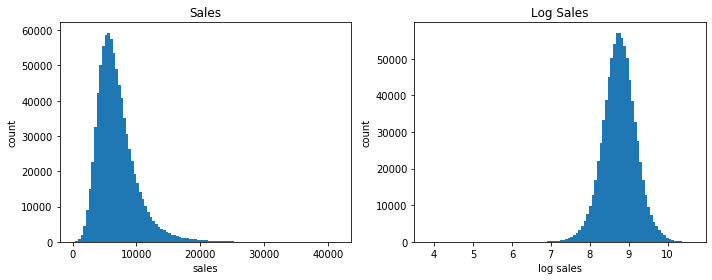

In [48]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
_ = plt.hist(train_df['Sales'],bins=100)
plt.title('Sales')
plt.ylabel('count')
plt.xlabel('sales')

plt.subplot(1,2,2)
_ = plt.hist(np.log(train_df['Sales']),bins=100)
plt.title('Log Sales')
plt.ylabel('count')
plt.xlabel('log sales')

plt.tight_layout()

From these plots it is clear that almost all datapoints have log('Sales') > 6, or 'Sales' > e^6 = 403.42. We confirm this below.

In [49]:
train_df[train_df['Sales']<np.e**6][['Date','Store','Sales']]

,Date,Store,Sales
202712,2015-01-31,898,124.0
273387,2014-11-22,652,46.0
752014,2013-08-26,175,316.0
846592,2013-06-03,1093,133.0
941137,2013-03-10,863,286.0
996161,2013-01-19,137,297.0


So, yes, there are only 6 datapoints with 'Sales' < e^6, all of them are at different stores, and all except 2 of them occur in 2013 (while the testing data is all in 2015). Thus, it seems these 6 points are pretty extreme outliers and should be removed. Doing this will also make the distribution on the log scale fairly symmetric about its range, as shown below.

8.332681063821965 8.757590151557297 8.759197750371365


Text(0.5, 0, 'log sales')

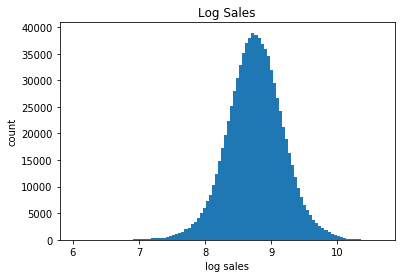

In [50]:
train_df = train_df[train_df['Sales']>=np.e**6]

Max, Min = np.log(train_df['Sales']).max(), np.log(train_df['Sales']).min() 
Mean, Median = np.mean(np.log(train_df['Sales'])), np.median(np.log(train_df['Sales']))
print((Max+Min)/2,Mean,Median)

plt.hist(np.log(train_df['Sales']),bins=100)
plt.title('Log Sales')
plt.ylabel('count')
plt.xlabel('log sales')

So, now (unsuprisingly) we will define a new variable 'LogSales', which we will use as the target of our training rather than 'Sales' directly. There are 2 reasons for doing this:

1. The distribution of 'LogSales' is highly symmetric, while the distribution of 'Sales' is less so. Training a neural network with a sigmoidal activation of the final layer (which we will do) tends to work better with symmetric target distributions. 

2. The loss function from Kaggle is the root-mean-square-percentage-error:

$$ RMSPE = \sqrt{ \frac{1}{N} \sum_{i=1}^N \Big( \frac{\hat{y_i}-y_i}{y_i} \Big)^2 }$$ 

where $y_i$ is the true value of 'Sales' for the ith datapoint, and $\hat{y_i}$ is the predicted value. For $\hat{y_i} \approx y_i$, a 1st order Taylor approximation gives $(\frac{\hat{y_i}-y_i}{y_i})^2 \approx \log^2(\hat{y_i}/y_i) = (\log(\hat{y_i})-\log(y_i))^2$. Thus, training with the ordinary mean-squared-error loss 
with the target as log('Sales') is roughly equivalent to training with the Kaggle loss function. BUT it is also
significantly more stable, in that single bad predictions don't tend to contribute too much to the loss.
For example, if a given datapoint has $\hat{y_i} = 5000$ and $y_i = 1000$, then $(\frac{\hat{y_i}-y_i}{y_i})^2 = 16$, but $(\log(\hat{y_i})-\log(y_i))^2 \approx 2.59$ (much smaller).  

In [51]:
train_df['LogSales'] = np.log(train_df['Sales'])
train_df.drop('Sales',axis=1,inplace=True)

#### Finally, let's just look at train_df and test_df again, after creating all the new features.

In [52]:
train_df.head()

,Store,DayOfWeek,Date,Open,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceYear,...,StateHolidayAfter,PromoRollBwdSum,ClosedRollBwdSum,SchoolHolidayRollBwdSum,StateHolidayRollBwdSum,PromoRollFwdSum,ClosedRollFwdSum,SchoolHolidayRollFwdSum,StateHolidayRollFwdSum,LogSales
0,1,5,2015-07-31,1,1,1,c,a,1270.0,2008.0,...,8.0,5.0,1.0,5.0,0.0,6.0,1.0,8.0,0.0,8.568456
1,2,5,2015-07-31,1,1,1,a,a,570.0,2007.0,...,0.0,5.0,1.0,6.0,0.0,1.0,0.0,1.0,0.0,8.710125
2,3,5,2015-07-31,1,1,1,a,a,14130.0,2006.0,...,8.0,5.0,1.0,6.0,0.0,6.0,1.0,6.0,0.0,9.025696
3,4,5,2015-07-31,1,1,1,c,c,620.0,2009.0,...,0.0,5.0,1.0,6.0,0.0,1.0,0.0,1.0,0.0,9.546455
4,5,5,2015-07-31,1,1,1,a,a,29910.0,2015.0,...,0.0,5.0,1.0,6.0,0.0,1.0,0.0,1.0,0.0,8.480944


In [53]:
test_df.head()

,Store,DayOfWeek,Date,Open,Promo,SchoolHoliday,Id,StoreType,Assortment,CompetitionDistance,...,StateHolidayBefore,StateHolidayAfter,PromoRollBwdSum,ClosedRollBwdSum,SchoolHolidayRollBwdSum,StateHolidayRollBwdSum,PromoRollFwdSum,ClosedRollFwdSum,SchoolHolidayRollFwdSum,StateHolidayRollFwdSum
0,1,4,2015-09-17,1,1,0,1,c,a,1270.0,...,8.0,8.0,4.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0
1,3,4,2015-09-17,1,1,0,2,a,a,14130.0,...,8.0,8.0,4.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0
2,7,4,2015-09-17,1,1,0,3,a,c,24000.0,...,8.0,8.0,4.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0
3,8,4,2015-09-17,1,1,0,4,a,a,7520.0,...,8.0,8.0,4.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0
4,9,4,2015-09-17,1,1,0,5,a,c,2030.0,...,8.0,8.0,4.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0


In [54]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceYear', 'Promo2SinceYear', 'PromoInterval', 'State',
       'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
       'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h',
       'Mean_Wind_SpeedKm_h', 'Precipitationmm', 'CloudCover', 'Events',
       'trend', 'trend_all', 'week', 'month', 'year', 'dayofmonth',
       'is_month_end', 'is_month_start', 'days_elapsed',
       'CompetitionOpenMonths', 'Promo2WeeksRunning', 'StateHolidayType',
       'PromoBefore', 'PromoAfter', 'ClosedBefore', 'ClosedAfter',
       'SchoolHolidayBefore', 'SchoolHolidayAfter', 'StateHolidayBefore',
       'StateHolidayAfter', 'PromoRollBwdSum', 'ClosedRollBwdSum',
       'SchoolHolidayRollBwdSum', 'StateHolidayRollBwdSum', 'PromoRollFwdSum',
       'ClosedRollFwdSum', 'SchoolHolidayRollFwdSum', 'StateHolidayRollFwdSum',
       

In [55]:
test_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'SchoolHoliday', 'Id',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceYear', 'Promo2SinceYear', 'PromoInterval', 'State',
       'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
       'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h',
       'Mean_Wind_SpeedKm_h', 'Precipitationmm', 'CloudCover', 'Events',
       'trend', 'trend_all', 'week', 'month', 'year', 'dayofmonth',
       'is_month_end', 'is_month_start', 'days_elapsed',
       'CompetitionOpenMonths', 'Promo2WeeksRunning', 'StateHolidayType',
       'PromoBefore', 'PromoAfter', 'ClosedBefore', 'ClosedAfter',
       'SchoolHolidayBefore', 'SchoolHolidayAfter', 'StateHolidayBefore',
       'StateHolidayAfter', 'PromoRollBwdSum', 'ClosedRollBwdSum',
       'SchoolHolidayRollBwdSum', 'StateHolidayRollBwdSum', 'PromoRollFwdSum',
       'ClosedRollFwdSum', 'SchoolHolidayRollFwdSum',
       'StateHolidayRollFwd

### EDA and Feature Selection

In this section we will examine, both visually and numerically, how our independent variables are related to the dependent variable 'LogSales' (as well as briefly examine how they are related to one another). The goal of this is two fold.

1. It helps us get a good conceptual idea of what variables are important for prediction, and how the variables relate. 

2. It can help us identify some variables that are not very important at all, and should be removed to simplify the model and avoid overfitting. 

To start let's just recall what all the variables (or features) are:

In [56]:
print(train_df.columns)

Index(['Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceYear', 'Promo2SinceYear', 'PromoInterval', 'State',
       'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
       'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h',
       'Mean_Wind_SpeedKm_h', 'Precipitationmm', 'CloudCover', 'Events',
       'trend', 'trend_all', 'week', 'month', 'year', 'dayofmonth',
       'is_month_end', 'is_month_start', 'days_elapsed',
       'CompetitionOpenMonths', 'Promo2WeeksRunning', 'StateHolidayType',
       'PromoBefore', 'PromoAfter', 'ClosedBefore', 'ClosedAfter',
       'SchoolHolidayBefore', 'SchoolHolidayAfter', 'StateHolidayBefore',
       'StateHolidayAfter', 'PromoRollBwdSum', 'ClosedRollBwdSum',
       'SchoolHolidayRollBwdSum', 'StateHolidayRollBwdSum', 'PromoRollFwdSum',
       'ClosedRollFwdSum', 'SchoolHolidayRollFwdSum', 'StateHolidayRollFwdSum',
       

Now we need to specify which features should be treated as categorical ('cats') and which should be treated
as continuous/real-valued ('conts'). For this purpose we will mostly treat binary and integer-valued features 
as categorical. This is much more informative for the plots. 

In [57]:
cats = ['Store', 'StoreType', 'Assortment', 'State', 'week', 'month', 'year', 'DayOfWeek', 'dayofmonth', 
            'Events', 'CompetitionOpenMonths', 'CompetitionOpenSinceYear', 'Promo2WeeksRunning', 'Promo2SinceYear', 
            'PromoInterval', 'StateHolidayType', 'StateHolidayBefore', 'StateHolidayAfter', 'SchoolHolidayBefore', 
            'SchoolHolidayAfter', 'PromoBefore', 'PromoAfter', 'ClosedBefore', 'ClosedAfter', 
            'StateHolidayRollBwdSum', 'SchoolHolidayRollBwdSum', 'PromoRollBwdSum', 'ClosedRollBwdSum', 
            'StateHolidayRollFwdSum', 'SchoolHolidayRollFwdSum', 'PromoRollFwdSum', 'ClosedRollFwdSum',
            'Promo', 'SchoolHoliday', 'is_month_end', 'is_month_start']           
            
conts = ['CompetitionDistance', 'days_elapsed', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
         'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h', 
         'CloudCover', 'Precipitationmm', 'trend', 'trend_all']

#### Part 1 - Plot relationships between our features and the dependent variables 'LogSales'

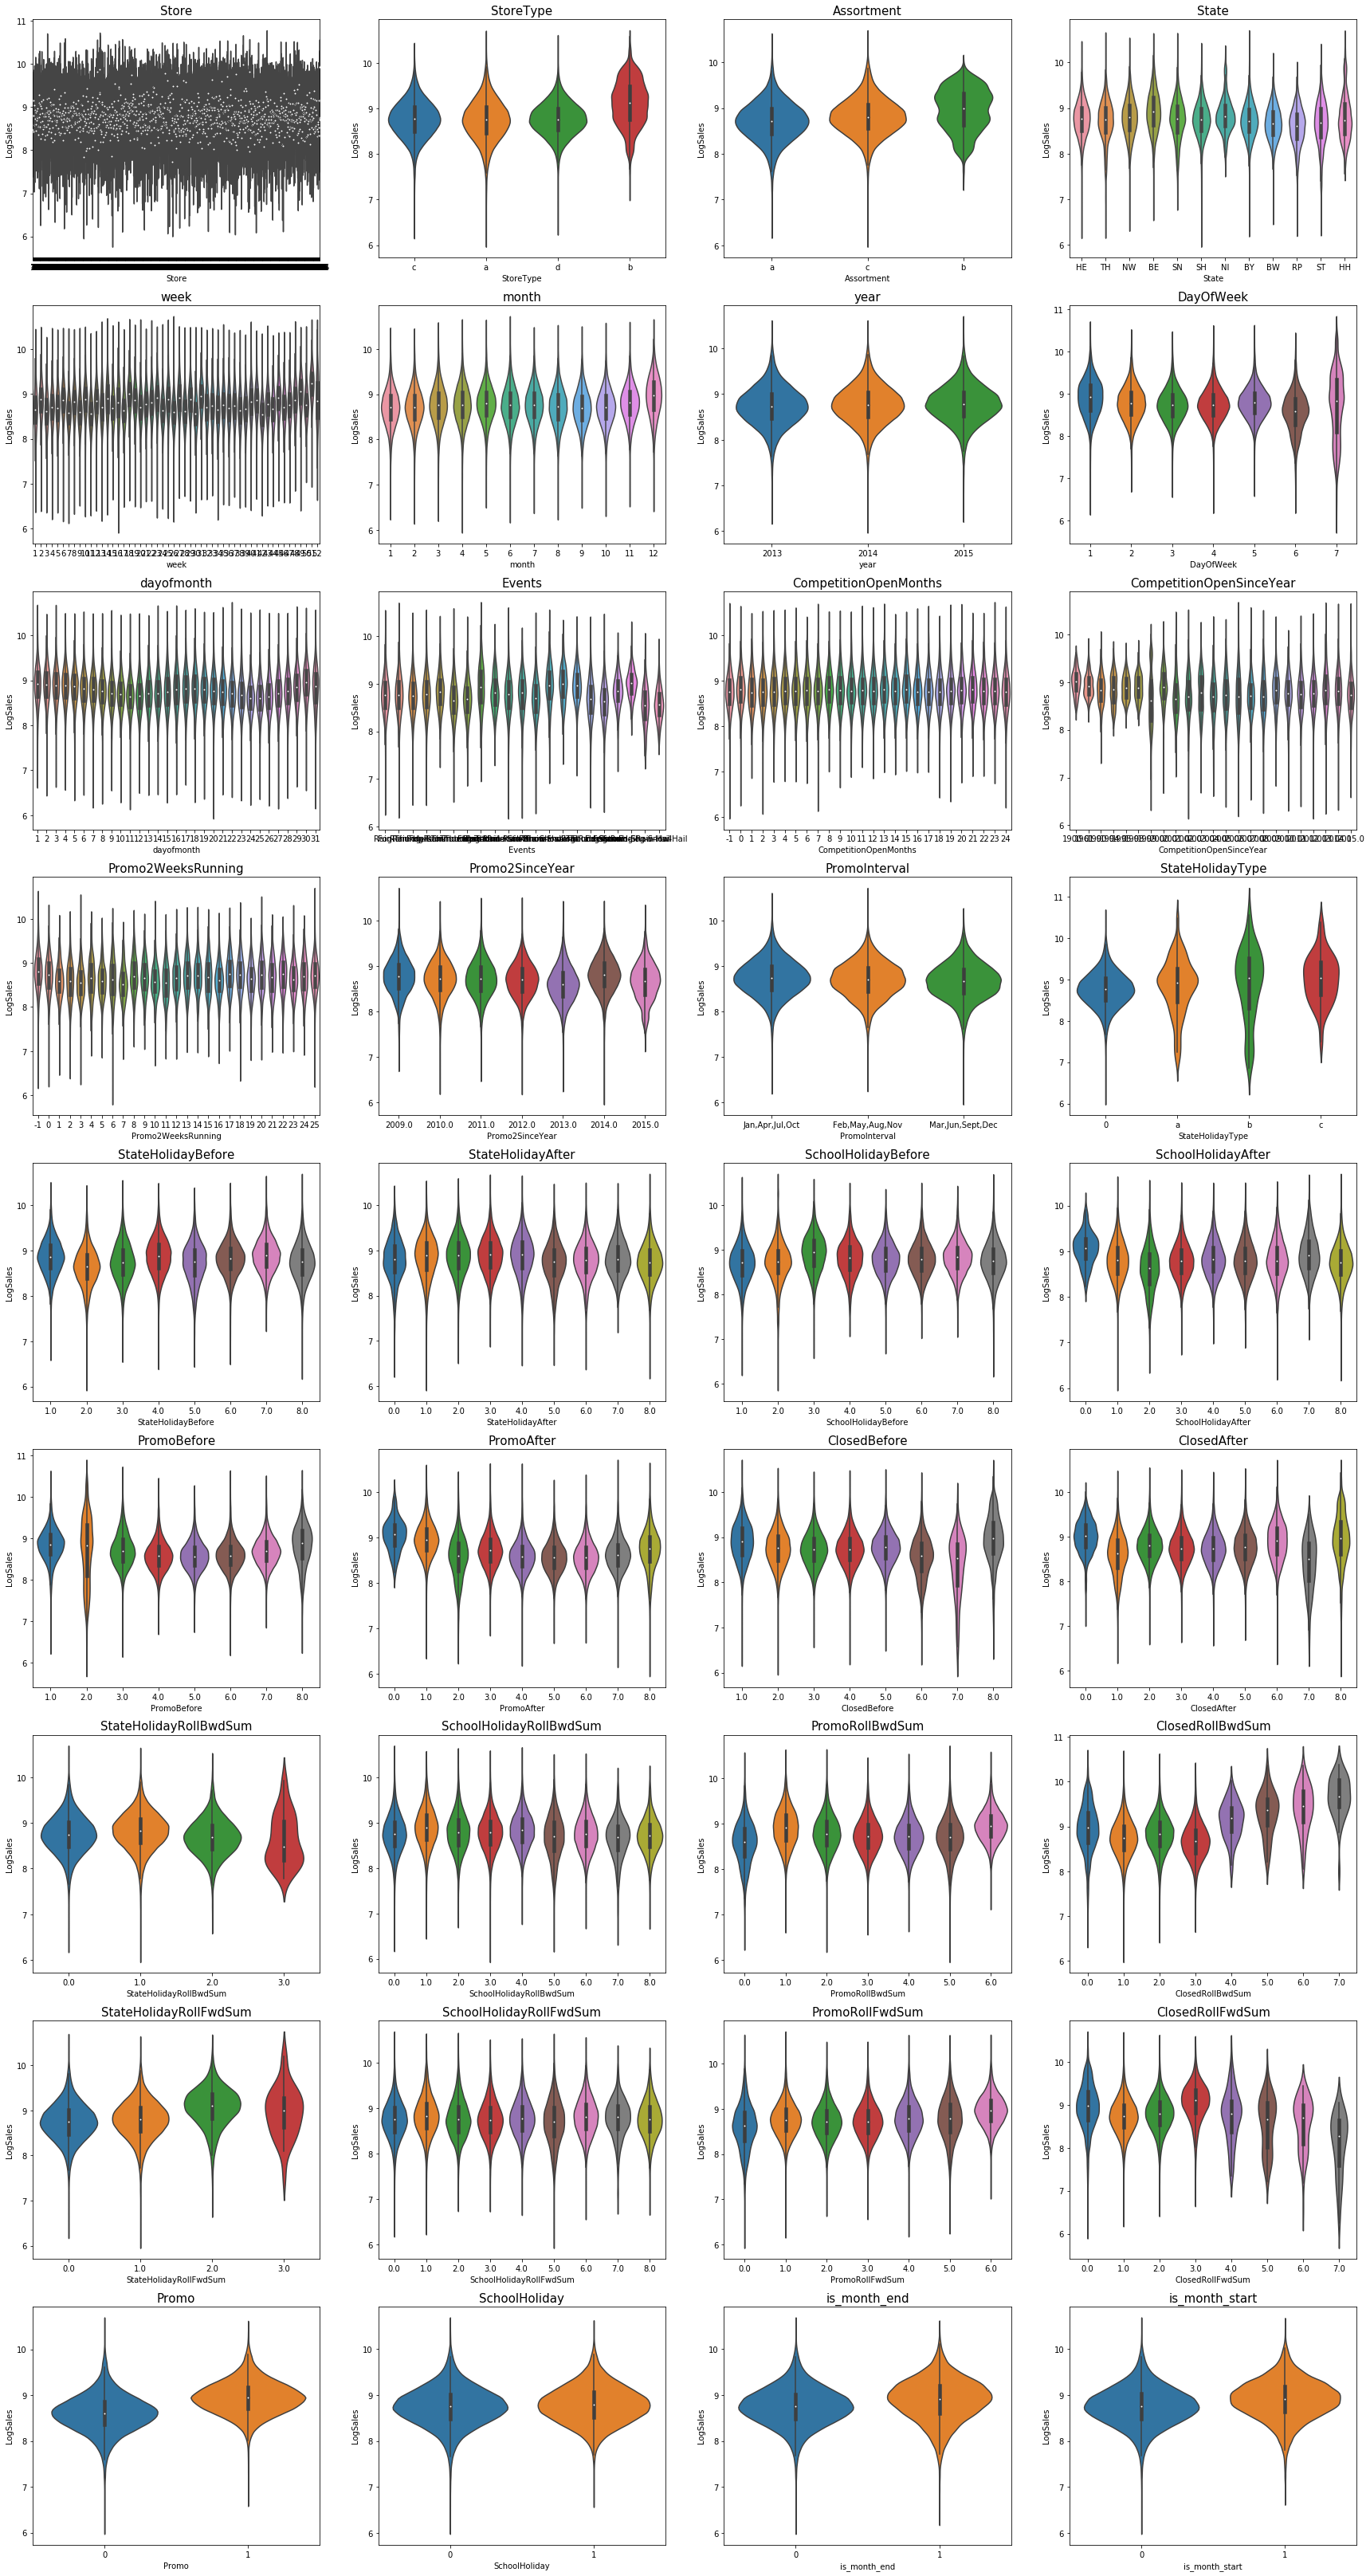

In [58]:
# Plot relationship of categorical features and 'LogSales' (violin plots).
plot_dependence(train_df,variables=cats,depend_var='LogSales',types='ContCat')

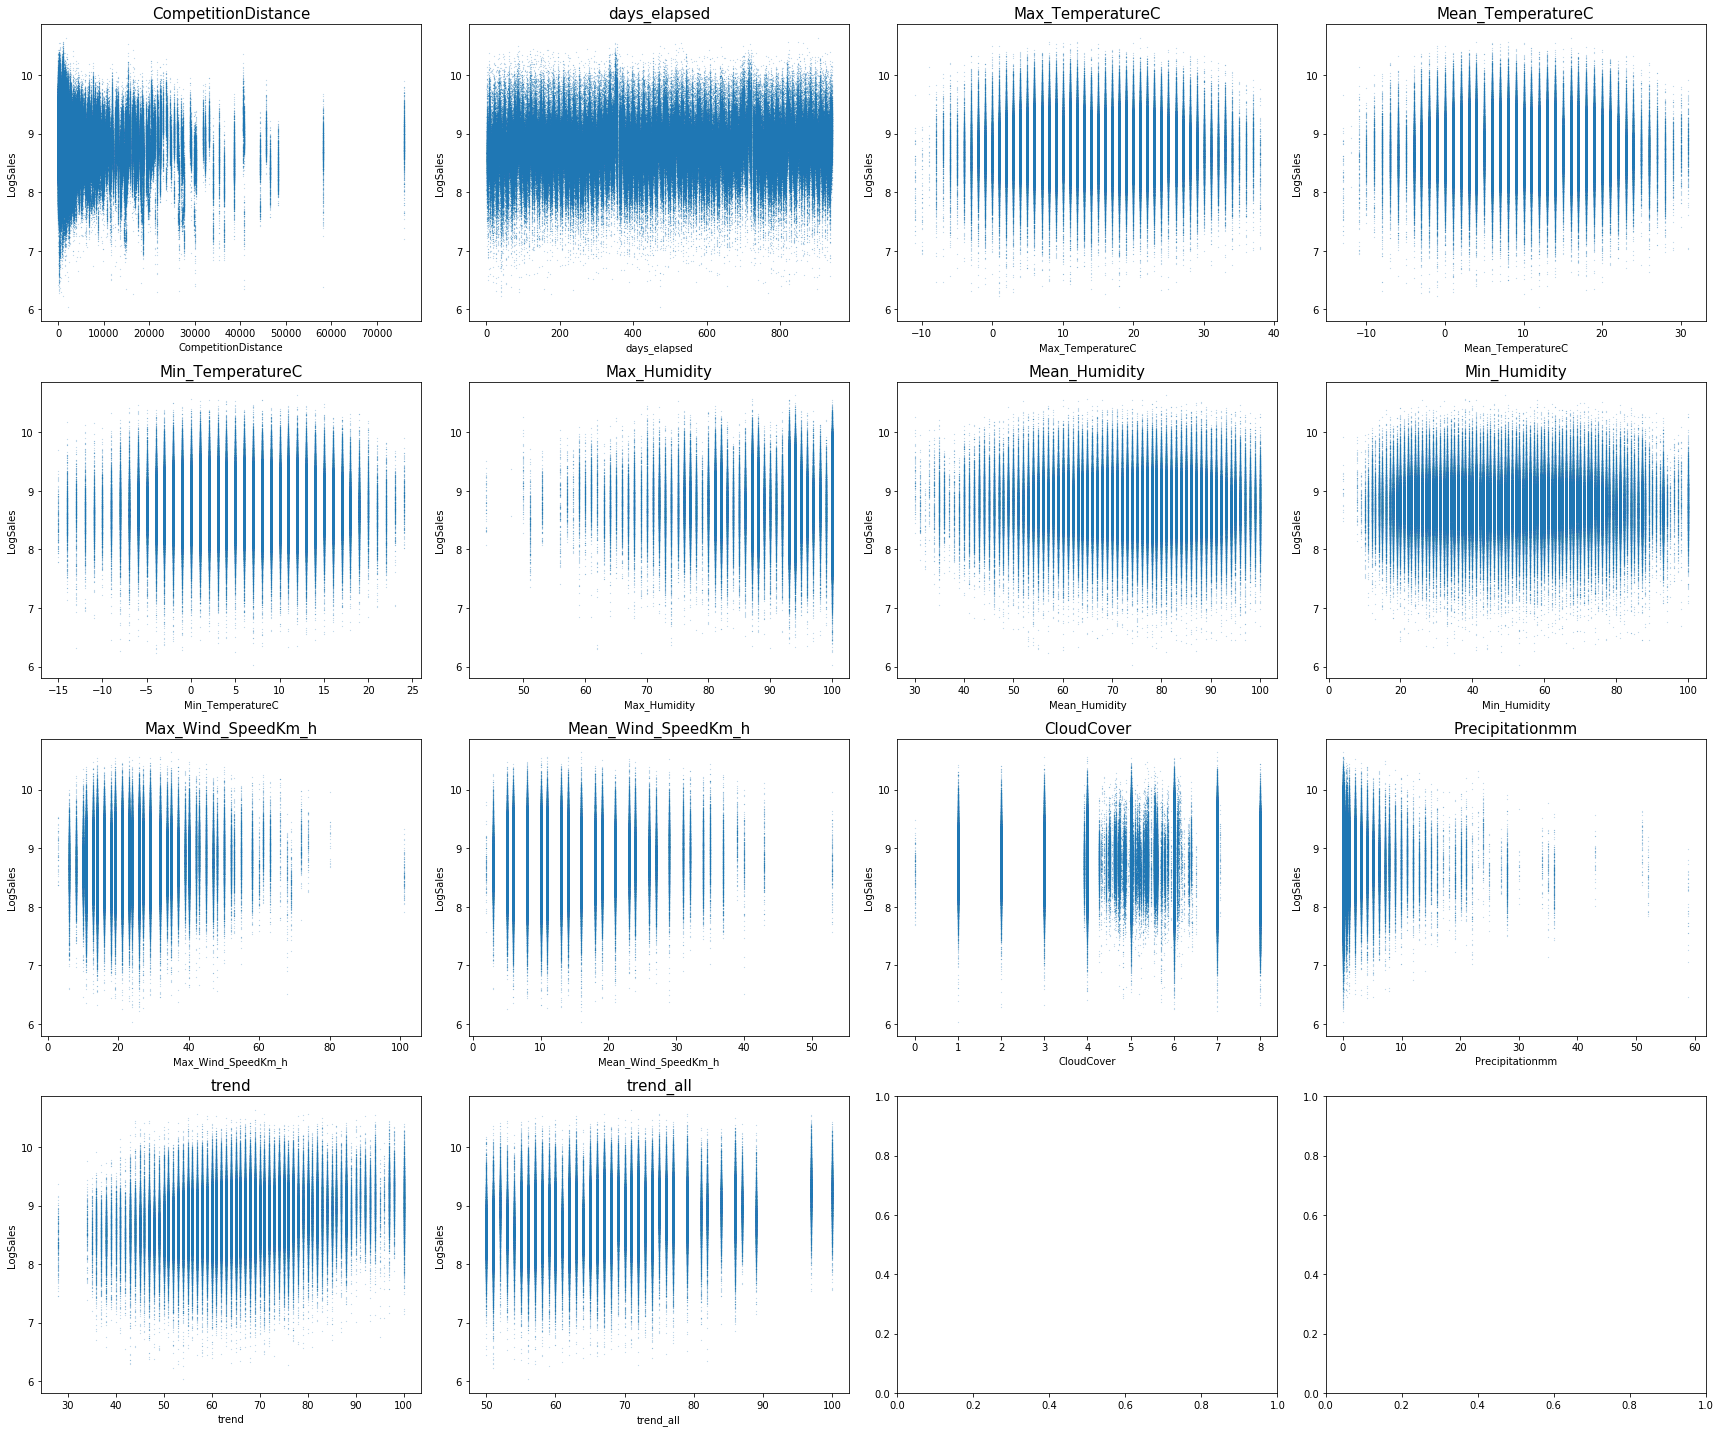

In [59]:
# Plot relationship between continuous features and 'LogSales' (scatter plots).
plot_dependence(train_df,variables=conts,depend_var='LogSales',types='ContCont',s=0.01)

# Note: Scatter plots look a little unusual (i.e. stripe-y) because many of 
# features are actually integer valued.

#### Part 2 - Compute Various measures of 'association' between our features and the dependent variable 'LogSales'

All these association measures are always in range [0,1] with 0 indicating indepence and 1 'maximal depenendence'. 
(See code for definitions.)

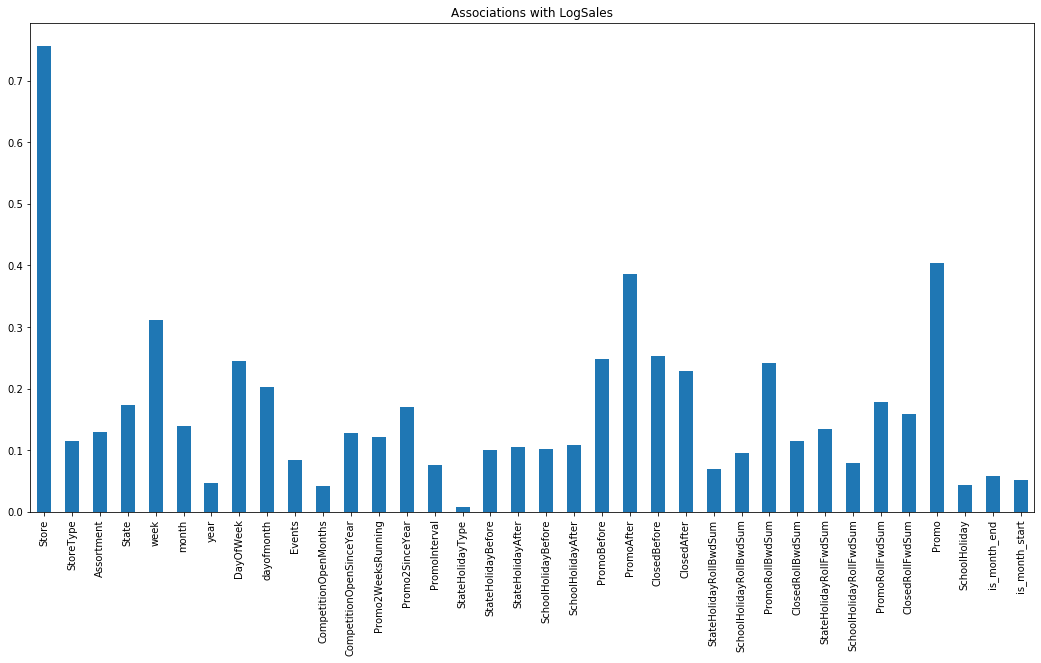

In [60]:
# correlation_ratio for categorical features
assoc_cat = associations_dependent(train_df,Type='correlation_ratio',variables=cats,depend_var='LogSales')

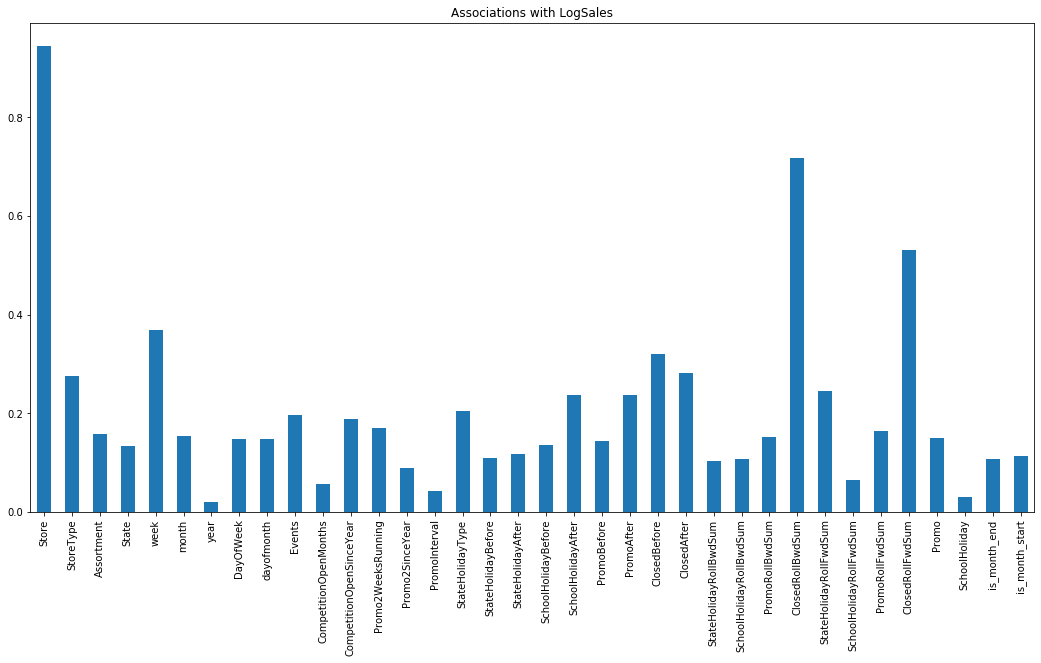

In [61]:
# max_correlation_ratio for categorical features
assoc_cat = associations_dependent(train_df,Type='max_correlation_ratio',variables=cats,depend_var='LogSales')

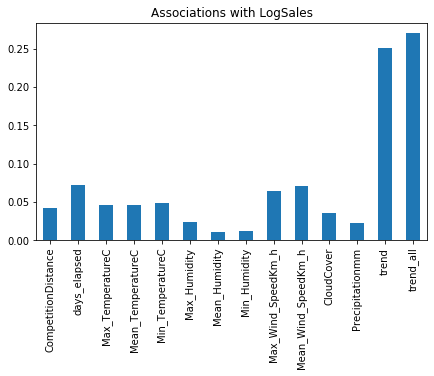

In [62]:
# abs_max_correlation for continuous features
assoc_cont = associations_dependent(train_df,Type='abs_max_correlation',variables=conts,depend_var='LogSales')

#### Part 3 - Remove Unimportant Features and Save Final Fully Engineered DataFrames to File

Based on the above plots in Part (2) we will remove the following features, which seem to have very little effect on the dependent variable:

'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Precipitationmm'.

I would have thought 'Precipitationmm' would have a larger effect, but the 'Events' variable also indicates whether or not rain or some other form of precipitation occurs, and is apparently much more informative.  The fact that humidity has a very small effect is, in retrospect, not super suprising.

In [63]:
drop_cols = ['Max_Humidity','Mean_Humidity','Min_Humidity','Precipitationmm']
test_df.drop(drop_cols,axis=1,inplace=True)
train_df.drop(drop_cols,axis=1,inplace=True)

train_df.to_csv('Rossmann/traindf.csv',index=False)
test_df.to_csv('Rossmann/testdf.csv',index=False)

In [64]:
traindf = pd.read_csv('Rossmann/traindf.csv',low_memory=False)
testdf = pd.read_csv('Rossmann/testdf.csv',low_memory=False)

In [65]:
traindf.head()

,Store,DayOfWeek,Date,Open,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceYear,...,StateHolidayAfter,PromoRollBwdSum,ClosedRollBwdSum,SchoolHolidayRollBwdSum,StateHolidayRollBwdSum,PromoRollFwdSum,ClosedRollFwdSum,SchoolHolidayRollFwdSum,StateHolidayRollFwdSum,LogSales
0,1,5,2015-07-31,1,1,1,c,a,1270.0,2008.0,...,8.0,5.0,1.0,5.0,0.0,6.0,1.0,8.0,0.0,8.568456
1,2,5,2015-07-31,1,1,1,a,a,570.0,2007.0,...,0.0,5.0,1.0,6.0,0.0,1.0,0.0,1.0,0.0,8.710125
2,3,5,2015-07-31,1,1,1,a,a,14130.0,2006.0,...,8.0,5.0,1.0,6.0,0.0,6.0,1.0,6.0,0.0,9.025696
3,4,5,2015-07-31,1,1,1,c,c,620.0,2009.0,...,0.0,5.0,1.0,6.0,0.0,1.0,0.0,1.0,0.0,9.546455
4,5,5,2015-07-31,1,1,1,a,a,29910.0,2015.0,...,0.0,5.0,1.0,6.0,0.0,1.0,0.0,1.0,0.0,8.480944


In [66]:
testdf.head()

,Store,DayOfWeek,Date,Open,Promo,SchoolHoliday,Id,StoreType,Assortment,CompetitionDistance,...,StateHolidayBefore,StateHolidayAfter,PromoRollBwdSum,ClosedRollBwdSum,SchoolHolidayRollBwdSum,StateHolidayRollBwdSum,PromoRollFwdSum,ClosedRollFwdSum,SchoolHolidayRollFwdSum,StateHolidayRollFwdSum
0,1,4,2015-09-17,1,1,0,1,c,a,1270.0,...,8.0,8.0,4.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0
1,3,4,2015-09-17,1,1,0,2,a,a,14130.0,...,8.0,8.0,4.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0
2,7,4,2015-09-17,1,1,0,3,a,c,24000.0,...,8.0,8.0,4.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0
3,8,4,2015-09-17,1,1,0,4,a,a,7520.0,...,8.0,8.0,4.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0
4,9,4,2015-09-17,1,1,0,5,a,c,2030.0,...,8.0,8.0,4.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0


#### Remark: 
Although the decisions of which features to keep/remove are made primarily by comparing the strength of 
association based on the plots in Part (2), the visual relationships depicted in Part (1) can also be helpful for understanding what is going on. For example, 'StateHolidayType' has a significant association with 'LogSales' under the 'max_correlation_ratio' measure, but a tiny association under the ordinary 'correlation_ratio'. If you look at the violin plot for 'StateHolidayType' you see significantly higher sales on the various holiday types 'a','b','c' than on 
non-holiday days labeled 0. This explains things: The holidays are of course very rare, so when you look at correlation ratio (which is class frequency weighted) it is quite small, while max_correlation_ratio 
(which is effectively like a maximum correlation ratios over classes) is much larger.

Generally speaking, a categorical feature should be considered unimportant only if it has a small
association with the dependendent variable under both the correlation_ratio and max_correlation_ratio measures.

#### Part 4 - Examine relationships between our features (for demonstration purposes only, we will not use this)

Plotting relationships for a subset of features.

In [67]:
CONTS = ['trend','Mean_TemperatureC','Max_TemperatureC']
CATS = ['StoreType','month','Promo']

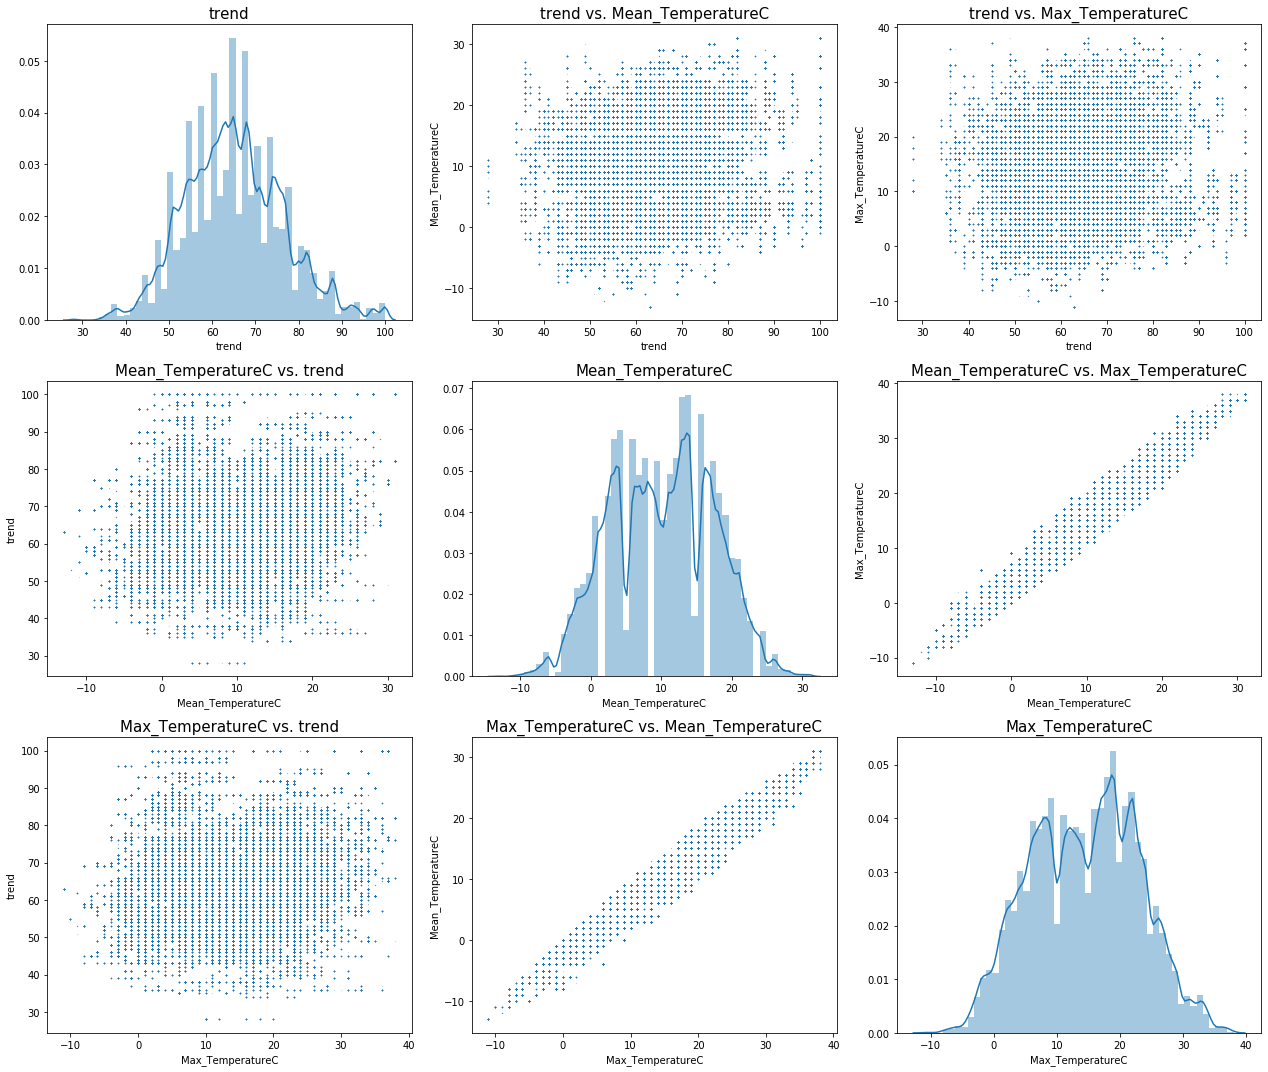

In [68]:
# Distribution of pairs of CONT features as scatter plots (individual distributions plotted on diagonal)
plot_pairs(train_df,var_types='Cont',variables=CONTS,s=0.01)

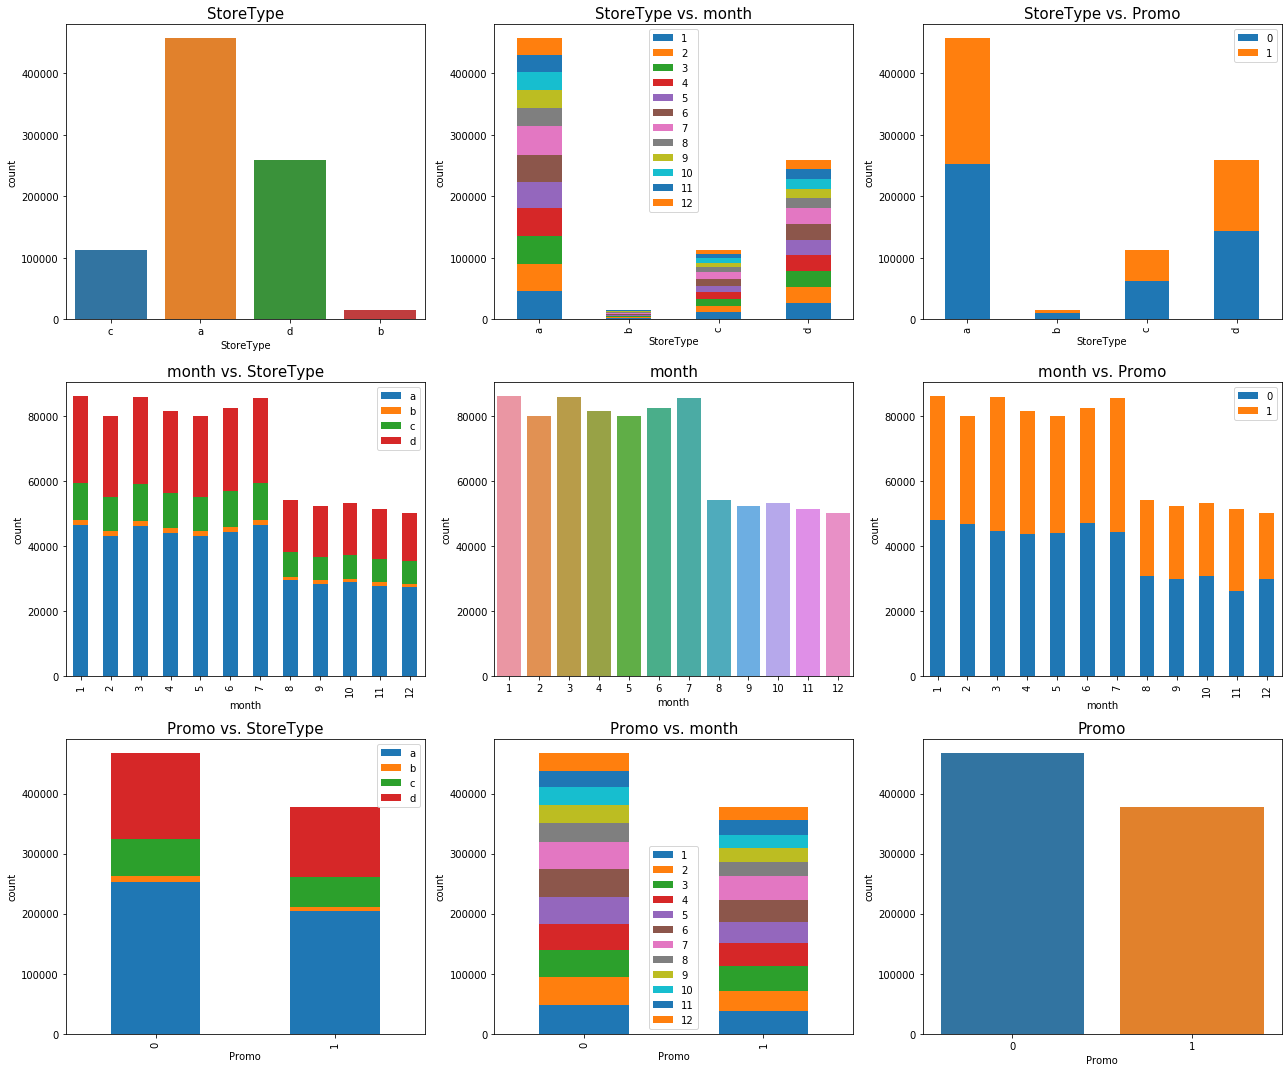

In [69]:
# Distribution of pairs of CAT features as stack bar graphs (individual distributions plotted on diagonal)
plot_pairs(train_df,var_types='Cat',variables=CATS)

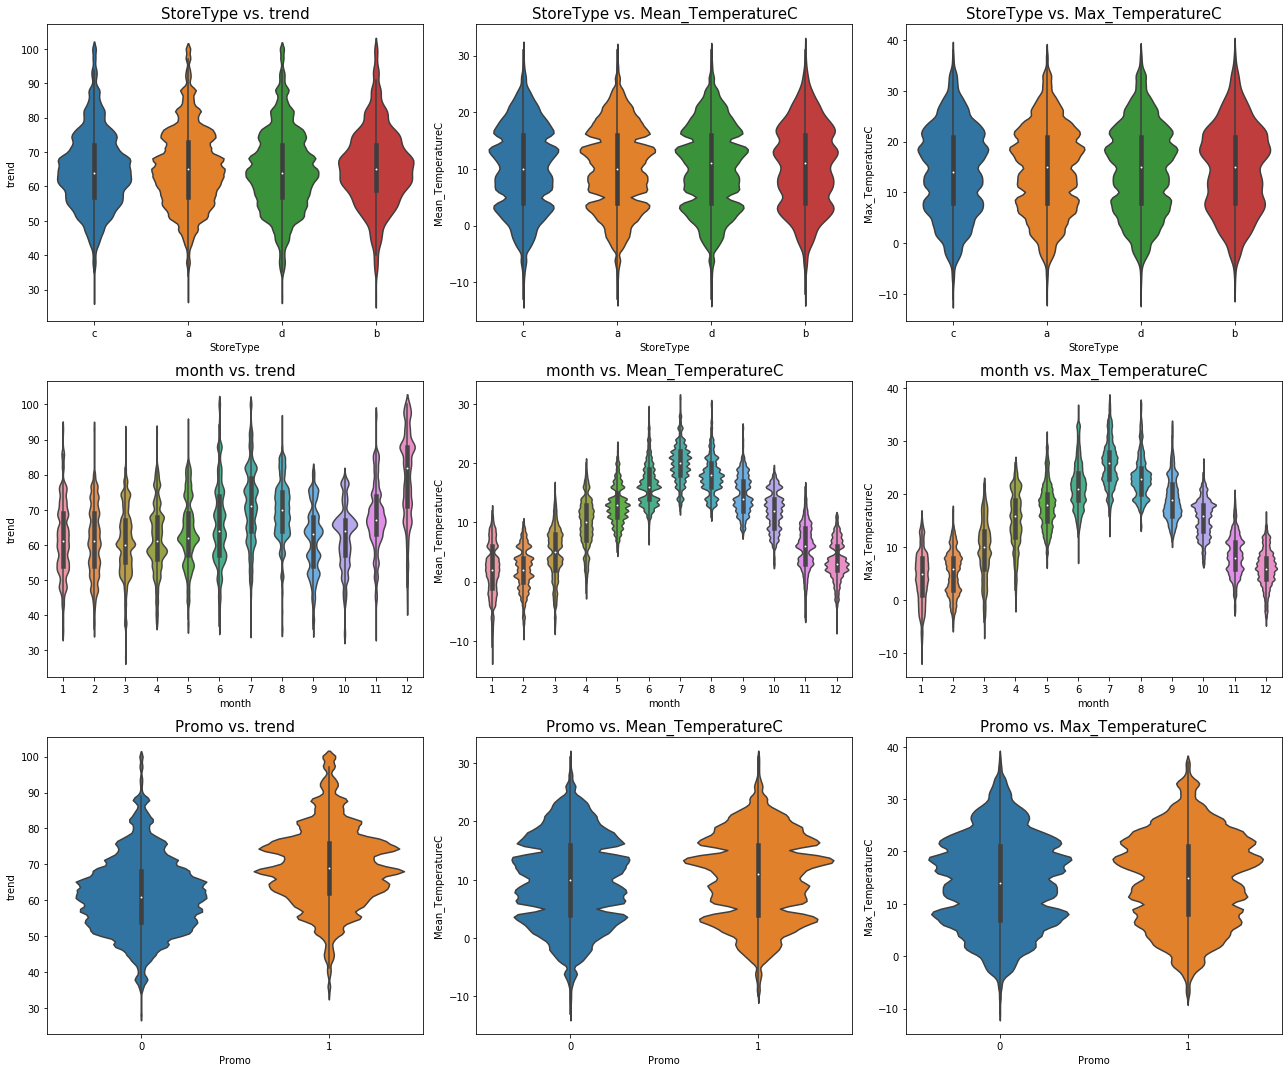

In [70]:
# Distribution of pairs of CAT & CONT features as violin plots
plot_pairs(train_df,var_types='ContCat',variables=[CONTS,CATS])

#NOTE: These plots look a bit funny because the 'CONT' features are actually integer-valued, 
#so we get semi-periodic shapes in the inferred densities, but the relationships are still clear.

Compute association measures for all retained features.

(Note: The 'association' between a variable and itself is always 1 (under any of the measures). However, we set it to
0 for the plots automatically, so that if other associations between features are small the difference between them shows up visually in the heatmaps.)

In [71]:
for feat in ['Max_Humidity','Mean_Humidity','Min_Humidity','Precipitationmm']: conts.remove(feat)

computing associations



plotting heatmap


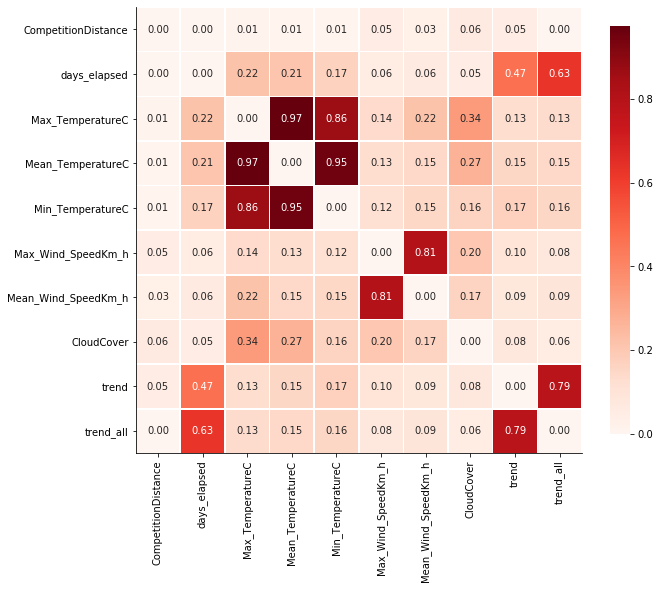

In [72]:
# associations between each pair of 'conts' features
assoc = associations_pairs(train_df,'abs_max_correlation',cont_vars=conts)

computing associations



plotting heatmap


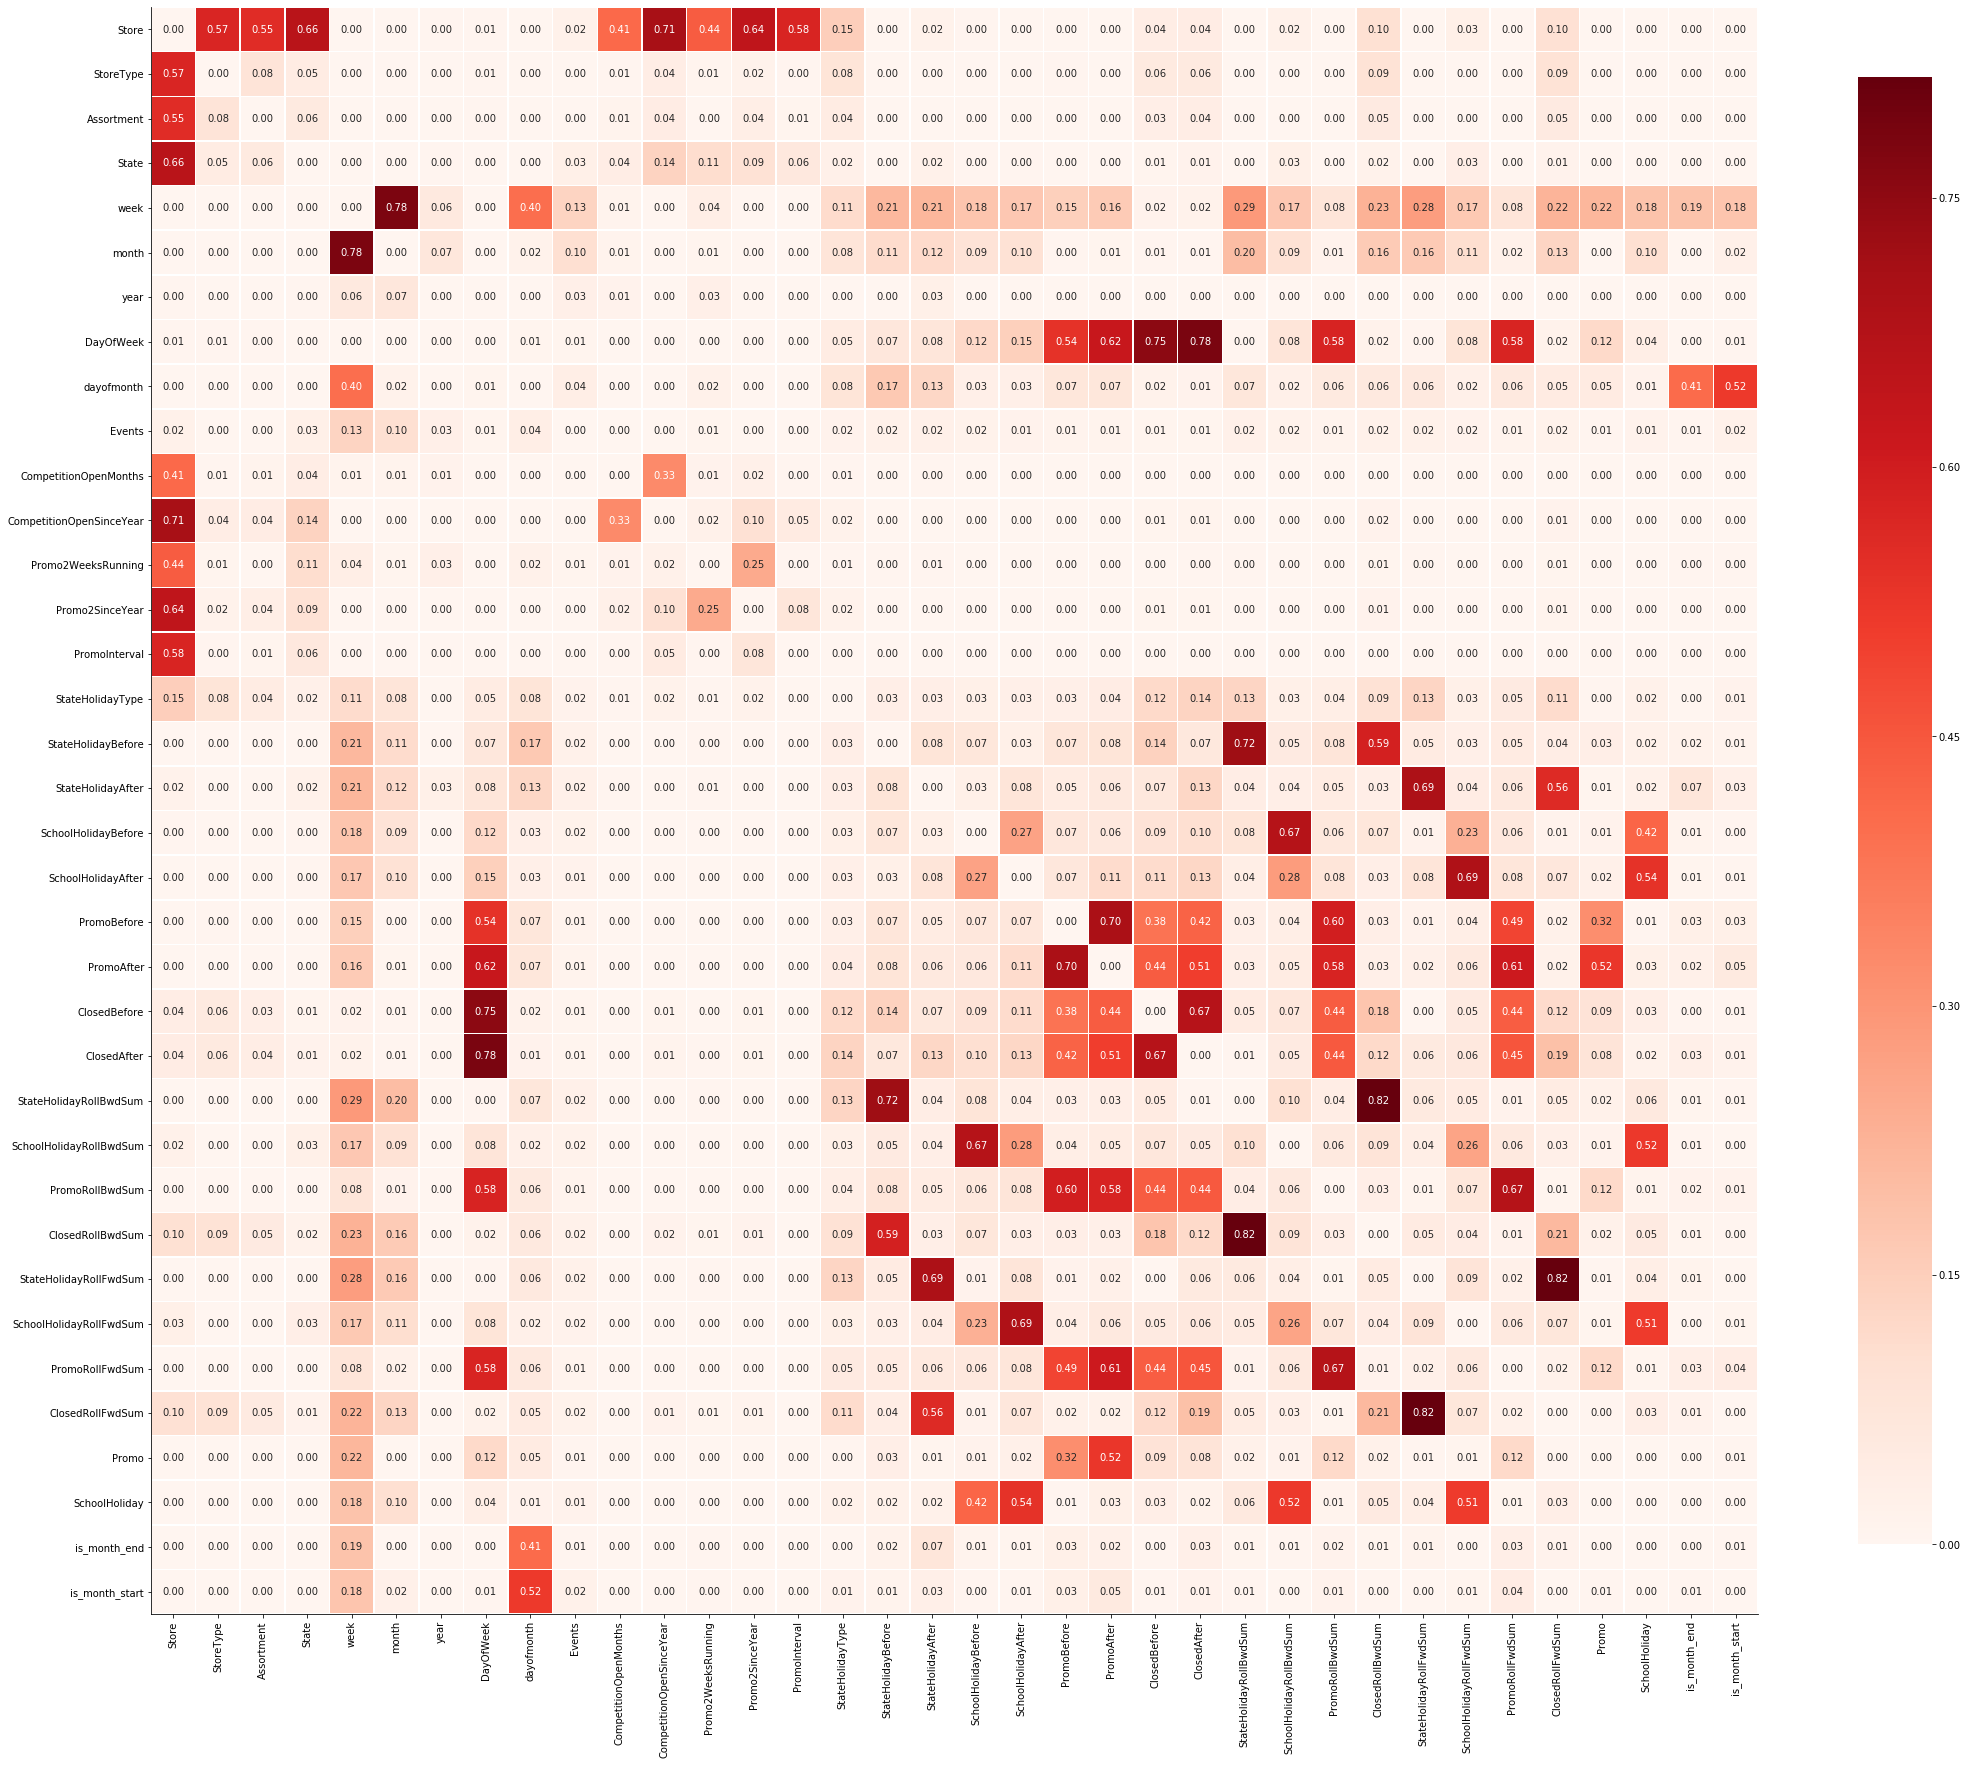

In [73]:
# associations between each pair of 'cats' features
assoc = associations_pairs(train_df,'mutual_info_symmetric',cat_vars=cats)

computing associations



plotting heatmap


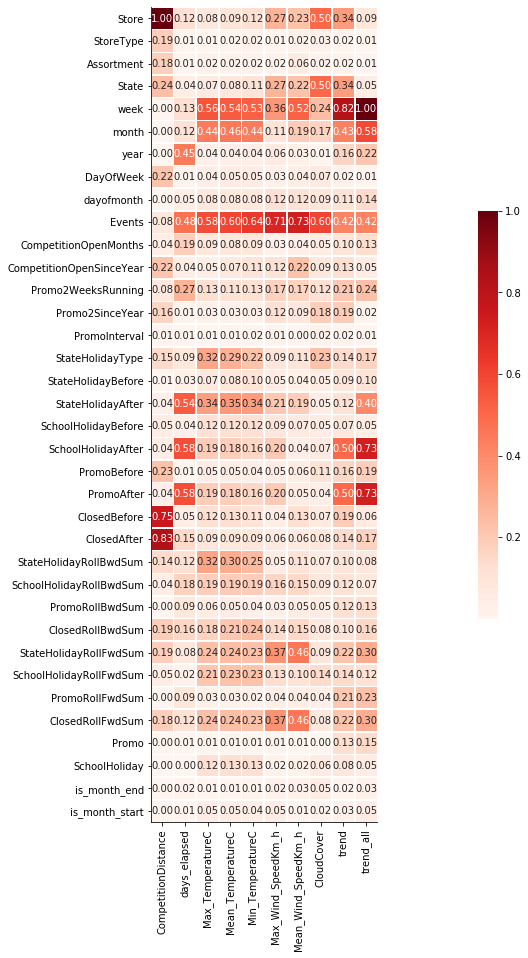

In [74]:
# associations between each pair of a 'cats' feature and a 'conts' feature
assoc = associations_pairs(train_df,'max_correlation_ratio',cat_vars=cats,cont_vars=conts)

### Create DataObj, Model, Learner

#### Step 1: Read in our saved feature-engineered dataframes from file

In [75]:
traindf = pd.read_csv('Rossmann/traindf.csv',low_memory=False)
testdf = pd.read_csv('Rossmann/testdf.csv',low_memory=False)

#### Step 2: Construct a validation set.

To do this it is helpful to look at dates of training and test data. 

In [76]:
train_dates = traindf['Date'].unique()
train_dates.sort()
print('Training Dates')
print(train_dates)

test_dates = test_df['Date'].unique()
test_dates.sort()
print('Testing Dates')
print(test_dates)

Training Dates
['2013-01-01' '2013-01-02' '2013-01-03' '2013-01-04' '2013-01-05'
 '2013-01-06' '2013-01-07' '2013-01-08' '2013-01-09' '2013-01-10'
 '2013-01-11' '2013-01-12' '2013-01-13' '2013-01-14' '2013-01-15'
 '2013-01-16' '2013-01-17' '2013-01-18' '2013-01-19' '2013-01-20'
 '2013-01-21' '2013-01-22' '2013-01-23' '2013-01-24' '2013-01-25'
 '2013-01-26' '2013-01-27' '2013-01-28' '2013-01-29' '2013-01-30'
 '2013-01-31' '2013-02-01' '2013-02-02' '2013-02-03' '2013-02-04'
 '2013-02-05' '2013-02-06' '2013-02-07' '2013-02-08' '2013-02-09'
 '2013-02-10' '2013-02-11' '2013-02-12' '2013-02-13' '2013-02-14'
 '2013-02-15' '2013-02-16' '2013-02-17' '2013-02-18' '2013-02-19'
 '2013-02-20' '2013-02-21' '2013-02-22' '2013-02-23' '2013-02-24'
 '2013-02-25' '2013-02-26' '2013-02-27' '2013-02-28' '2013-03-01'
 '2013-03-02' '2013-03-03' '2013-03-04' '2013-03-05' '2013-03-06'
 '2013-03-07' '2013-03-08' '2013-03-09' '2013-03-10' '2013-03-11'
 '2013-03-12' '2013-03-13' '2013-03-14' '2013-03-15' '2013-03

So, we see the training dates cover a period of over 2 years from 01/01/2013 to 07/31/2015, and the test dates 
cover a 48 day period from 08/01/2015 to 09/17/2015, immediately following the training period. Given this, it seems reasonable to use the last 48 days of the training data for validation.

In [77]:
# Convert the 'Date' Column back to Timestamps (saves as strings in the csv file).
traindf['Date'] = pd.to_datetime(traindf['Date'])
testdf['Date'] = pd.to_datetime(testdf['Date'])

# Define start and end dates for validation set
start = pd.Timestamp('06/14/2015')
end = pd.Timestamp('07/31/2015')

# Split train_df into train and validation
val_idxs = np.array((traindf['Date']>=start) & (traindf['Date']<=end)).astype(int).nonzero()[0]
valdf = traindf.loc[val_idxs].copy()
traindf = traindf.drop(val_idxs)

#### Step 3: Specify categorical variables, continuous (i.e. numeric) variables, and output variable (i.e. dependent variable) for our model

NOTE: Inside the code categorical variables are first embedded into a lower dimensional space (i.e. lower than cardinality of the variable). These categorical embeddings are then concatenated with the continuous/real-valued variables, and this single concatenated vector is then passed through a multi-layer fully connected network.

Given that this is the model approach, the following rules of thumb are useful when choosing variable types:
1. Binary variables should generally be treated as "continuous". Embedding a binary variable into a length 1 vector 
is just a scale and shift, which the neural network can easily learn. 
2. 'Naturally integer valued' variables with med to low cardinality (but > 2) are often best treated as categorical, especially if their relation with the dependent variable may be complicated or non-monotonic. Since the embedding weights are learned by the model, it allows the model to capture the important 'structure' of such complicated variables. For example, 'month' could be treated as an integer 1-12 = Jan-Dec, and this numerical ordering is not totally irrelevant. But, since shopping behavior is likely not monotonic with month number, it may be preferable to treat 'month' as categorical. 

In [78]:
# Check again what all the variables are
traindf.columns

Index(['Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceYear', 'Promo2SinceYear', 'PromoInterval', 'State',
       'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
       'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h', 'CloudCover', 'Events',
       'trend', 'trend_all', 'week', 'month', 'year', 'dayofmonth',
       'is_month_end', 'is_month_start', 'days_elapsed',
       'CompetitionOpenMonths', 'Promo2WeeksRunning', 'StateHolidayType',
       'PromoBefore', 'PromoAfter', 'ClosedBefore', 'ClosedAfter',
       'SchoolHolidayBefore', 'SchoolHolidayAfter', 'StateHolidayBefore',
       'StateHolidayAfter', 'PromoRollBwdSum', 'ClosedRollBwdSum',
       'SchoolHolidayRollBwdSum', 'StateHolidayRollBwdSum', 'PromoRollFwdSum',
       'ClosedRollFwdSum', 'SchoolHolidayRollFwdSum', 'StateHolidayRollFwdSum',
       'LogSales'],
      dtype='object')

In [80]:
# Specify Variable Types
cat_vars = ['Store', 'StoreType', 'Assortment', 'State', 'week', 'month', 'year', 'DayOfWeek', 'dayofmonth', 
            'Events', 'CompetitionOpenMonths', 'CompetitionOpenSinceYear', 'Promo2WeeksRunning', 'Promo2SinceYear', 
            'PromoInterval', 'StateHolidayType', 'StateHolidayBefore', 'StateHolidayAfter', 'SchoolHolidayBefore', 
            'SchoolHolidayAfter', 'PromoBefore', 'PromoAfter', 'ClosedBefore', 'ClosedAfter', 
            'StateHolidayRollBwdSum', 'SchoolHolidayRollBwdSum', 'PromoRollBwdSum', 'ClosedRollBwdSum', 
            'StateHolidayRollFwdSum', 'SchoolHolidayRollFwdSum', 'PromoRollFwdSum', 'ClosedRollFwdSum']           
            
cont_vars = ['LogSales', 'CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 
             'Min_TemperatureC', 'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 
             'trend_all', 'days_elapsed', 'is_month_end','is_month_start', 'Promo', 'SchoolHoliday']

output_var = 'LogSales'

# NOTE: The variables 'Open' and 'Date' are not included in either 'cat_vars' or 'cont_vars', and are thus not used
# by the model. 'Open' is always equal to 1, in the subset of data we are modeling on, so it is useless. 'Date' may
# be important for sales, but the test data is for a completely different set of dates than the training data, so
# using 'Date' as part of the modeling is not advisable. 

#### Step 4: Finally, define the DataObj, Model, and Learner

In [81]:
# DataObj
data = StructuredDataObj.from_dataframes(traindf, valdf, cat_vars, cont_vars, output_var, bs=1024, test_df = testdf)

# Model
output_range = [5,12]
fc_layer_sizes = [1000,500,1]
dropout_levels = (0.04,0.04,[0,0.5,0.25])
model = StructuredDataNet.from_dataobj(data, fc_layer_sizes=fc_layer_sizes, 
                                       output_range=output_range, dropout_levels=dropout_levels)
# Learner
PATH = 'Rossmann'
learner = Learner(PATH, data, model, optimizer='Adam')

Note: 
Since we did not specify a loss function when defining our learner, and the target is continuous, the default loss function is the mean-squared-error loss. That is, we are using mean-squared-error of the target variable 'LogSales'.

But, the actual metric specified by Kaggle is the root-mean-square-percentage-error of 'Sales' itself. 
As noted above, when we first defined the 'LogSales' variable, mean-squared-error of 'LogSales' should 
be reasonaly close to mean-square-percentage-error of 'Sales', as long as the predictions themselves are decently good. But using the standard mean-squared-error on 'LogSales' is a more stable way to train. 

Nevertheless, it is useful to monitor the Kaggle metric directly as well. This will be done using the expMSPE_loss() class, which simply returns the mean-squared-percentage-error between the quantities exp(pred) and exp(target). Hence, it is the square of the Kaggle metric, since our target variable is 'LogSales'. 

In [82]:
# Exponential mean-squared-percentage error loss. 
emspe = expMSPE_loss()

### TRAINING 

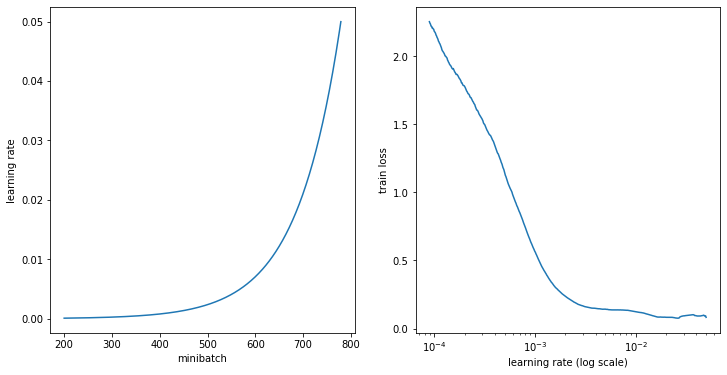

In [83]:
learner.find_lr(lr_max=0.05,wd=1e-3,plot_start_batch=200)

In [84]:
lr_max = 0.01
learner.fit_one_cycle(lr_max,24,wd=1e-3,metrics=[emspe])

epoch   train_loss  val_loss    metrics     

0       0.03849     0.02687     0.03352       epoch run time: 0 min, 31.44 sec
1       0.02444     0.02064     0.02407       epoch run time: 0 min, 31.80 sec
2       0.02051     0.01389     0.01530       epoch run time: 0 min, 31.31 sec
3       0.01837     0.01417     0.01465       epoch run time: 0 min, 31.30 sec
4       0.01792     0.01259     0.01287       epoch run time: 0 min, 31.71 sec
5       0.01741     0.01213     0.01326       epoch run time: 0 min, 31.39 sec
6       0.01827     0.01220     0.01326       epoch run time: 0 min, 30.59 sec
7       0.01752     0.01195     0.01249       epoch run time: 0 min, 30.29 sec
8       0.01742     0.01330     0.01259       epoch run time: 0 min, 31.68 sec
9       0.01661     0.01145     0.01250       epoch run time: 0 min, 30.97 sec
10      0.01608     0.01142     0.01259       epoch run time: 0 min, 31.82 sec
11      0.01560     0.01105     0.01215       epoch run time: 0 min, 30.65 sec
12    

### Ensembling and Kaggle Submission

We will train 10 models on the full training dataset for Kaggle submission, and then average the predictions.

It is helpful to use the full training dataset during our training, and not reserve the last 48 days for validation, because we want the most recent sales info from our stores when predicting the sales values in the period immediately following the training data. 

Because a validation set must be specified the way the code is set up, the last 100 entries of the traindf will be used for this purpose. But this is entirely artificial, as the training set contains these validation datapoints. Thus, the values of the val loss observed during training should not be pereceived as meaningful. 

We have verified the training procedure works well above (by reserving the last 48 days for validation), and now we will simply repeat the exact same procedure (with the extra 48 days for training) 10 times.

#### Define DataObj (used for training all models)

In [85]:
# Read in DataFrames
traindf = pd.read_csv('Rossmann/traindf.csv',low_memory=False)
testdf = pd.read_csv('Rossmann/testdf.csv',low_memory=False)

traindf['Date'] = pd.to_datetime(traindf['Date'])
testdf['Date'] = pd.to_datetime(testdf['Date'])

# Construct Validation Set
valdf = traindf.iloc[-100:].copy()

# Define DataObj
data = StructuredDataObj.from_dataframes(traindf, valdf, cat_vars, cont_vars, output_var, bs=1024, test_df = testdf)

#### Train the models

In [86]:
PATH = 'Rossmann'
output_range = [5,12]
fc_layer_sizes = [1000,500,1]
dropout_levels = (0.04,0.04,[0,0.5,0.25])
lr_max = 0.01

Models = []
for i in range(10):    
    
    print('model', i)
    model = StructuredDataNet.from_dataobj(data, fc_layer_sizes, output_range=output_range, dropout_levels=dropout_levels)    
    learner = Learner(PATH, data, model, optimizer='Adam')    
    learner.fit_one_cycle(lr_max,24,wd=1e-3)
    learner.save('model_'+str(i))
    Models.append(learner.model)
    clear_output()

#### Create Ensemble and Predict

In [87]:
EnsembleModel = StructuredDataEnsembleNet(Models)
learner.model = EnsembleModel
pred = learner.predict('test')
pred = np.exp(pred)

#### Create Kaggle Submission

In [88]:
submission_df = pd.DataFrame({"Id":np.arange(1,len(pred)+1),"Sales":pred})  
submission_df.to_csv('Rossmann/submission.csv',index=False)

sub = pd.read_csv('Rossmann/submission.csv')
sub

,Id,Sales
0,1,4414.2085
1,2,7141.7660
2,3,8839.5250
3,4,7081.7705
4,5,7211.0474
5,6,5689.0493
6,7,7192.3800
7,8,7986.3180
8,9,5199.6120
9,10,5714.0615


This submission received a Kaggle private leaderboard score of 0.10918 (with the root-mean-square-percentage-error of 'Sales' as the metric). This would have been 12th place in the competition out of 3303 teams. 

The winning score was 0.10021, and everything from the 5th place score and up was over 0.1076. 